In [1]:
import matplotlib.pyplot as plt  
import numpy as np
import os
import sys
import pandas as pd
import geopandas as gpd
import yaml
import matplotlib.pyplot as plt  
import numpy as np
import os
import sys
import pandas as pd
import geopandas as gpd
import yaml

In [2]:
def process_key(key):
    # Convert string key to a tuple
    return safe_tuple_parser(key)

def process_value(value):
    # Convert string value to float
    return float(value)

def safe_tuple_parser(key):
    """
    Safely parses string representations of nested 
    tuples into actual Python tuples.
    Example: "(2024, (1, 7, 0), (1, 8), 2024)" -> (2024, (1, 7, 0), (1, 8), 2024)
    """
    import ast  # Abstract Syntax Tree module for safe literal evaluation

    # Remove outer quotes if present and use `ast.literal_eval`
    try:
        return ast.literal_eval(key)
    except (SyntaxError, ValueError) as e:
        raise ValueError(f"Failed to parse key: {key}") from e


In [3]:
def read_data(case_study_name, input_file_name):
    current_path = os.getcwd()
    print("Current path:", current_path)
    file_results = os.path.normpath(current_path + "/results")
    print("File results:", os.path.normpath(file_results))
    file_path = os.path.join(current_path, "/results")
    print(file_path)
    # Normalize the path
    normalized_path = os.path.normpath(file_path)
    print("Normalized path:", normalized_path)

    # reading input data 
    folder_input = os.path.normpath(current_path + "/data")
    with open(folder_input + "/" + input_file_name) as file:
        input_data = yaml.safe_load(file)

    with open(os.path.normpath(file_results + "/" + case_study_name + "_n_fueling_dict.yaml")) as file:
        n_fueling_dict= yaml.safe_load(file)

    with open(os.path.normpath(file_results + "/" + case_study_name + "_budget_penalty_minus_dict.yaml")) as file:
        budget_penalty_minus_dict = yaml.safe_load(file)

    with open(os.path.normpath(file_results + "/" + case_study_name + "_budget_penalty_plus_dict.yaml")) as file:
        budget_penalty_plus_dict= yaml.safe_load(file)

    with open(os.path.normpath(file_results + "/" + case_study_name + "_budget_penalty_plus_yearly_dict.yaml")) as file:
        budget_penalty_plus_yearly_dict= yaml.safe_load(file)

    with open(os.path.normpath(file_results + "/" + case_study_name + "_budget_penalty_minus_yearly_dict.yaml")) as file:
        budget_penalty_minus_yearly_dict= yaml.safe_load(file)

    # with open(os.path.normpath(file_results + "/" + case_study_name + "_detour_time_dict.yaml")) as file:
    #     detour_time_dict= yaml.safe_load(file)

    # with open(os.path.normpath(file_results + "/" + case_study_name + "_f_dict.yaml")) as file:
    #     f_dict= yaml.safe_load(file)

    with open(os.path.normpath(file_results + "/" + case_study_name + "_h_dict.yaml")) as file:
        h_dict= yaml.safe_load(file)

    # with open(os.path.normpath(file_results + "/" + case_study_name + "_h_exist_dict.yaml")) as file:
    #     h_exist_dict= yaml.safe_load(file)

    # with open(os.path.normpath(file_results + "/" + case_study_name + "_h_minus_dict.yaml")) as file:
    #     h_minus_dict= yaml.safe_load(file)

    # with open(os.path.normpath(file_results + "/" + case_study_name + "_h_plus_dict.yaml")) as file:
    #     h_plus_dict= yaml.safe_load(file)

    with open(os.path.normpath(file_results + "/" + case_study_name + "_q_fuel_infr_plus_dict.yaml")) as file:
        q_fuel_infr_plus_dict= yaml.safe_load(file)

    with open(os.path.normpath(file_results + "/" + case_study_name + "_q_fuel_infr_plus_by_route_dict.yaml")) as file:
        q_fuel_infr_plus_by_route_dict= yaml.safe_load(file)

    # with open(os.path.normpath(file_results + "/" + case_study_name + "_q_mode_infr_plus_dict.yaml")) as file:
    #     q_mode_infr_plus_dict= yaml.safe_load(file)

    with open(os.path.normpath(file_results + "/" + case_study_name + "_s.yaml")) as file:
        s_dict= yaml.safe_load(file)

    with open(os.path.normpath(file_results + "/" + case_study_name + "_vot_dt_dict.yaml")) as file:
        vot_dt_dict = yaml.safe_load(file)

    with open(os.path.normpath(file_results + "/" + case_study_name + "_x_c_dict.yaml")) as file:
        x_c_dict = yaml.safe_load(file)
    
    budget_penalty_minus = {process_key(key): process_value(value) for key, value in budget_penalty_minus_dict.items()}
    budget_penalty_plus = {process_key(key): process_value(value) for key, value in budget_penalty_plus_dict.items()}
    # detour_time = {process_key(key): process_value(value) for key, value in detour_time_dict.items()}
    # f = {process_key(key): process_value(value) for key, value in f_dict.items()}
    h = {process_key(key): process_value(value) for key, value in h_dict.items()}
    # h_exist = {process_key(key): process_value(value) for key, value in h_exist_dict.items()}
    # h_minus = {process_key(key): process_value(value) for key, value in h_minus_dict.items()}
    # h_plus = {process_key(key): process_value(value) for key, value in h_plus_dict.items()}
    q_fuel_infr_plus = {process_key(key): process_value(value) for key, value in q_fuel_infr_plus_dict.items()}
    q_fuel_infr_plus_by_route = {process_key(key): process_value(value) for key, value in q_fuel_infr_plus_by_route_dict.items()}
    # q_mode_infr_plus = {process_key(key): process_value(value) for key, value in q_mode_infr_plus_dict.items()}
    s = {process_key(key): process_value(value) for key, value in s_dict.items()}
    n_fueling = {process_key(key): process_value(value) for key, value in n_fueling_dict.items()}
    vot_dt_dict = {process_key(key): process_value(value) for key, value in vot_dt_dict.items()}
    x_c = {process_key(key): process_value(value) for key, value in x_c_dict.items()}
    # # detour_time = {}
    # # n_fueling = {}
    # output_data = {"budget_penalty_minus": budget_penalty_minus, "budget_penalty_plus": budget_penalty_plus, "detour_time": detour_time, "f": f, "h": h, "h_exist": h_exist, "h_minus": h_minus, "h_plus": h_plus, "q_fuel_infr_plus": q_fuel_infr_plus, "q_mode_infr_plus": q_mode_infr_plus, "s": s, "n_fueling": n_fueling}
    output_data = {"h": h, "s": s, "q_fuel_infr_plus": q_fuel_infr_plus, "q_fuel_infr_plus_by_route": q_fuel_infr_plus_by_route, "n_fueling": n_fueling, "vot_dt_dict": vot_dt_dict, "x_c_dict": x_c, "budget_penalty_minus": budget_penalty_minus, "budget_penalty_plus": budget_penalty_plus}  # Assuming you only want to return f_dict for now
    return input_data, output_data

In [4]:
# case_study_names = {"cs_2025-06-02_18-48-03": "Distributed Densification",
#                    "cs_2025-06-03_07-53-03": "Balanced Densification",
#                    "cs_2025-06-02_13-51-34": "
#  Centralized Densification"}
# # case_studies = ["cs_2025-04-03_09-52-20", "cs_2025-04-03_11-23-29", "cs_2025-03-27_11-00-01"]
# input_files = {
#     "cs_2025-06-02_18-48-03": "transport_data_v1_ONENODE_distributed.yaml",
#     "cs_2025-06-03_07-53-03": "transport_data_v1_ONENODE_balanced.yaml",
#     "cs_2025-06-02_13-51-34": "transport_data_v1_ONENODE_concentrated.yaml"
# 
# 
# before adjusting the monetary budget: 
# case_study_names = {
#                     #"cs_2025-08-18_18-24-16": "Balanced Densification",
#                     "cs_2025-08-20_11-27-21": "Balanced Densification",
#                     "cs_2025-08-18_11-34-07": "Distributed Densification",
#                    "cs_2025-08-19_08-49-11": "Centralized Densification"
#                    }
# # case_studies = ["cs_2025-04-03_09-52-20", "cs_2025-04-03_11-23-29", "cs_2025-03-27_11-00-01"]
# input_files = {
#     "cs_2025-08-18_11-34-07": "td_ONENODE_distributed_expansion_cut_demand.yaml",
#     "cs_2025-08-20_11-27-21": "td_ONENODE_balanced_expansion_cut_demand.yaml",
#     # "cs_2025-08-18_18-24-16": "td_ONENODE_balanced_expansion_cut_demand.yaml",
#     "cs_2025-08-19_08-49-11": "td_ONENODE_concentrated_expansion_cut_demand_cut_steps.yaml"
    
# }
# after adjusting the monetary budget: 
# new (no home charging, limited set of routes)
case_study_names = {
                    "cs_2025-09-24_08-51-20": "Distributed Densification",

                    "cs_2025-09-24_11-03-29": "Balanced Densification",
                    "cs_2025-09-24_10-25-23": "Centralized Densification"
                   }
# case_studies = ["cs_2025-04-03_09-52-20", "cs_2025-04-03_11-23-29", "cs_2025-03-27_11-00-01"]
input_files = {
    "cs_2025-09-24_08-51-20": "td_ONENODE_distributed_expansion_23092025_test.yaml",
    "cs_2025-09-24_11-03-29": "td_ONENODE_balanced_expansion_24092025.yaml",
    # "cs_2025-08-18_18-24-16": "td_ONENODE_balanced_expansion_cut_demand.yaml",
    "cs_2025-09-24_10-25-23": "td_ONENODE_concentrated_expansion_24092025.yaml"

}
# # old (no home charging, limited set of routes)
# case_study_names = {
#                     "cs_2025-09-08_18-39-57": "Distributed Densification",

#                     "cs_2025-09-08_18-34-36": "Balanced Densification",
#                     "cs_2025-09-08_18-08-18": "Centralized Densification"
#                    }
# # case_studies = ["cs_2025-04-03_09-52-20", "cs_2025-04-03_11-23-29", "cs_2025-03-27_11-00-01"]
# input_files = {
#     "cs_2025-09-08_18-39-57": "td_ONENODE_distributed_expansion_220906.yaml",
#     "cs_2025-09-08_18-34-36": "td_ONENODE_balanced_expansion_220906.yaml",
#     # "cs_2025-08-18_18-24-16": "td_ONENODE_balanced_expansion_cut_demand.yaml",
#     "cs_2025-09-08_18-08-18": "td_ONENODE_concentrated_expansion_220906.yaml"

# }
case_study_output = {}
case_study_input = {}
for cs in case_study_names.keys():
    input_data, output_data = read_data(cs, input_files[cs])
    case_study_output[case_study_names[cs]] = output_data
    case_study_input[case_study_names[cs]] = input_data

Current path: c:\Users\simuser\Documents\AntoniaGolab\iDesignRES_transcompmodel\examples\Basque country
File results: c:\Users\simuser\Documents\AntoniaGolab\iDesignRES_transcompmodel\examples\Basque country\results
c:/results
Normalized path: c:\results
Current path: c:\Users\simuser\Documents\AntoniaGolab\iDesignRES_transcompmodel\examples\Basque country
File results: c:\Users\simuser\Documents\AntoniaGolab\iDesignRES_transcompmodel\examples\Basque country\results
c:/results
Normalized path: c:\results
Current path: c:\Users\simuser\Documents\AntoniaGolab\iDesignRES_transcompmodel\examples\Basque country
File results: c:\Users\simuser\Documents\AntoniaGolab\iDesignRES_transcompmodel\examples\Basque country\results
c:/results
Normalized path: c:\results


In [5]:
dt_by_case_and_type = {}
y_init = 2020
g_init = 2020-25
Y_end = 2050
for case_study_name, output_data in case_study_output.items():
    print(f"\n🔹 Processing case: {case_study_name}")

    input_data = case_study_input.get(case_study_name, {})
    if not input_data:
        print(f"  ⚠️ Missing input for {case_study_name}, skipping...")
        continue

    # Quick info instead of full print
    x_c = output_data.get("x_c_dict", {})
    print(f"  x_c size: {len(x_c)}")

    initial_dt  = input_data.get("InitDetourTime", [])
    dt_reduction = input_data.get("DetourTimeReduction", [])
    print(f"  InitDetourTime entries: {len(initial_dt)}, DetourTimeReduction entries: {len(dt_reduction)}")

    dt_by_case_and_type[case_study_name] = {}

    for l_id, cs_type in {2: "public_fast", 3: "public_slow"}.items():
        print(f"    → Checking {cs_type} (l_id={l_id})")
        dt_by_case_and_type[case_study_name][cs_type] = {}
        min_dt_time = 10000
        for year in np.arange(y_init, Y_end, 5):
            print(f"      Year: {year}")

            filtered_x_c = {k: v for k, v in x_c.items() 
                            if k[0] == year and k[1][3] == l_id and v == 1}
            print(f"        filtered_x_c count: {len(filtered_x_c)}")

            if not filtered_x_c:
                print(f"        ⚠️ No match, skipping...")
                continue

            try:
                performed_reduction = next(iter(filtered_x_c))
                reducion_id = performed_reduction[1][1]
            except Exception as e:
                print(f"        ❌ Error extracting reduction_id: {e}")
                continue

            matching_reduction = next(
                (item for item in dt_reduction 
                 if item.get("fueling_type") == cs_type and item.get("reduction_id") == reducion_id),
                None
            )
            dt_value = matching_reduction.get("detour_time_reduction") if matching_reduction else None
            if dt_value is None:
                print(f"        ⚠️ No matching reduction found for id={reducion_id}")
                continue

            matching_initial = next(
                (item for item in initial_dt if item.get("fuel_infr_type") == cs_type),
                None
            )
            init_dt = matching_initial.get("detour_time") * (1-0.25) if matching_initial else None
            if init_dt is None:
                print(f"        ⚠️ No initial detour time found for {cs_type}")
                continue
            
            dt_in_this_year_and_type = init_dt * (1-0.25)  if year == 2020 else init_dt * (1 - dt_value)
            if min_dt_time < dt_in_this_year_and_type:
                print("detour time grows again at", year)
                dt_in_this_year_and_type = min_dt_time
            
            dt_by_case_and_type[case_study_name][cs_type][int(year)] = dt_in_this_year_and_type
            min_dt_time = dt_in_this_year_and_type
            print(f"        ✅ Stored dt: {dt_in_this_year_and_type}")



🔹 Processing case: Distributed Densification
  x_c size: 135
  InitDetourTime entries: 3, DetourTimeReduction entries: 15
    → Checking public_fast (l_id=2)
      Year: 2020
        filtered_x_c count: 1
        ✅ Stored dt: 0.5853287537785924
      Year: 2025
        filtered_x_c count: 1
        ✅ Stored dt: 0.24974026827886603
      Year: 2030
        filtered_x_c count: 1
        ✅ Stored dt: 0.24974026827886603
      Year: 2035
        filtered_x_c count: 1
        ✅ Stored dt: 0.24974026827886603
      Year: 2040
        filtered_x_c count: 1
        ✅ Stored dt: 0.24974026827886603
      Year: 2045
        filtered_x_c count: 1
        ✅ Stored dt: 0.24974026827886603
    → Checking public_slow (l_id=3)
      Year: 2020
        filtered_x_c count: 1
        ✅ Stored dt: 0.32059776200092227
      Year: 2025
        filtered_x_c count: 1
detour time grows again at 2025
        ✅ Stored dt: 0.32059776200092227
      Year: 2030
        filtered_x_c count: 1
detour time grows again

In [6]:
for case_study_name, output_data in list(case_study_output.items())[:1]:
    for year in np.arange(y_init, y_init+5, 5):
        print(case_study_name, year)
        break


Distributed Densification 2020


In [7]:
years_to_calc = [2030, 2040]
y_init = 2020
g_init = 2020-25
Y_end = 2050
tech_split_per_case_study = {year: {} for year in years_to_calc}
veh_tech_per_case_study = {year: {} for year in years_to_calc}

for case_study_name, output_data in case_study_output.items():
    input_data = case_study_input[case_study_name]

    financial_status = input_data["FinancialStatus"]
    odpair_list = input_data["Odpair"]
    financial_status_dict = {item["name"]: item for item in financial_status}
    odpair_list_dict = {item["id"]: item for item in odpair_list}
    techvehicle_list = input_data["TechVehicle"]
    techvehicle_list_dict = {item["id"]: item for item in techvehicle_list}
    h = output_data["h"]

    for year in years_to_calc:
        tech_split_by_fs = {}
        veh_tech_by_fs = {}
        for fs in financial_status_dict.keys():
            h_total = sum([h.get((year, r, tv, g)) for r in odpair_list_dict.keys() for tv in techvehicle_list_dict.keys() for g in range(g_init, year) if (year, r, tv, g) in h and fs == odpair_list_dict[r]["financial_status"]])
            h_elec = sum([h.get((year, r, tv, g)) for r in odpair_list_dict.keys() for tv in techvehicle_list_dict.keys() for g in range(g_init, year) if (year, r, tv, g) in h and fs == odpair_list_dict[r]["financial_status"] and techvehicle_list_dict[tv]["technology"] == 2])
            print(f"Year: {year}, h_elec: {h_elec}, h_total: {h_total}, fs: {fs}")
            tech_split_by_fs[fs] = h_elec / h_total if h_total > 0 else 0.0
            veh_tech_by_fs[fs] = h_elec
        tech_split_per_case_study[year][case_study_name] = tech_split_by_fs
        veh_tech_per_case_study[year][case_study_name] = veh_tech_by_fs


Year: 2030, h_elec: 1259.488159, h_total: 70164.314172, fs: First quintile
Year: 2030, h_elec: 2238.272747, h_total: 87260.98459, fs: Second quintile
Year: 2030, h_elec: 5807.760316, h_total: 104196.458952, fs: Third quintile
Year: 2030, h_elec: 68016.411228, h_total: 115382.045485, fs: Fourth quintile
Year: 2030, h_elec: 87249.282217, h_total: 135349.430278, fs: Fifth quintile
Year: 2030, h_elec: 20674.211811, h_total: 42483.186079, fs: Commercial
Year: 2040, h_elec: 7878.338905, h_total: 67262.548401, fs: First quintile
Year: 2040, h_elec: 18498.128289, h_total: 83266.410164, fs: Second quintile
Year: 2040, h_elec: 46948.704864, h_total: 95536.223164, fs: Third quintile
Year: 2040, h_elec: 77590.880525, h_total: 112499.572369, fs: Fourth quintile
Year: 2040, h_elec: 85785.103257, h_total: 130049.77651, fs: Fifth quintile
Year: 2040, h_elec: 21789.899908, h_total: 40743.654159, fs: Commercial
Year: 2030, h_elec: 1259.488159, h_total: 70164.31417, fs: First quintile
Year: 2030, h_elec:

In [8]:
for year, cases in veh_tech_per_case_study.items():
    print(f"Year: {year}")
    for case, fs_dict in cases.items():
        total = sum(fs_dict.values())
        print(f"  {case}: {total}")

Year: 2030
  Distributed Densification: 185245.426478
  Balanced Densification: 183101.90001800001
  Centralized Densification: 179322.288389
Year: 2040
  Distributed Densification: 258491.05574799998
  Balanced Densification: 273899.347402
  Centralized Densification: 274742.534148


In [9]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Garamond",
    "font.size": 18,
})

<>:44: SyntaxWarning: invalid escape sequence '\%'
<>:44: SyntaxWarning: invalid escape sequence '\%'
C:\Users\simuser\AppData\Local\Temp\ipykernel_34268\723614393.py:44: SyntaxWarning: invalid escape sequence '\%'
  ax.set_ylabel("Electrification share ($\%$)")


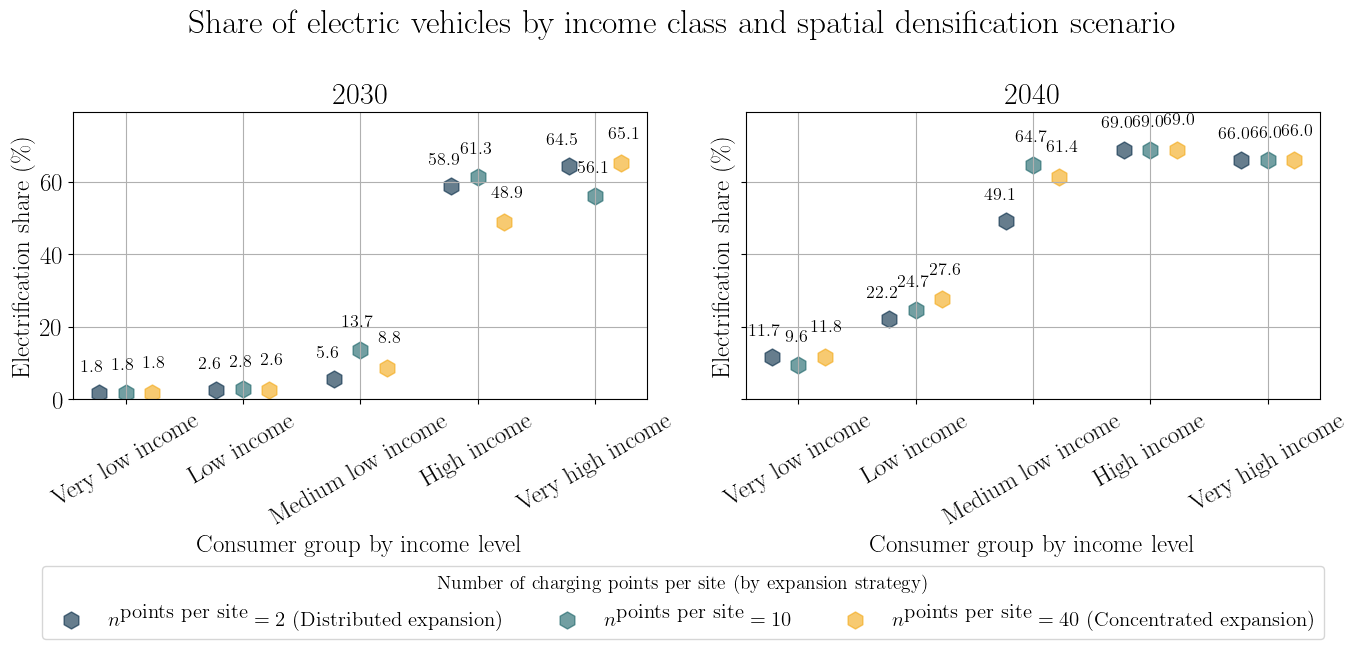

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# dictionaries (already defined)
actual_labels = {
    "Distributed Densification": r"$n^{\textrm{points per site}} = 2$ (Distributed expansion)",
    "Balanced Densification": r"$n^{\textrm{points per site}} = 10$",
    "Centralized Densification": r"$n^{\textrm{points per site}} = 40$ (Concentrated expansion)"
}
Income_level_labels = {
    "First quintile": "Very low income",
    "Second quintile": "Low income",
    "Third quintile": "Medium low income",
    "Fourth quintile": "High income",
    "Fifth quintile": "Very high income",
    # "Commercial": "Commercial"
}

income_classes = list(Income_level_labels.keys())
case_studies = list(actual_labels.keys())

colors_by_case = {
    "Distributed Densification": "#002642",
    "Balanced Densification": "#156064",
    "Centralized Densification": "#f3a712"
}

fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

# Dynamic offsets for scatter points
spread = 0.15 * len(case_studies)
offsets = np.linspace(-spread/2, spread/2, len(case_studies))

for idx, plot_year in enumerate([2030, 2040]):
    filtered_tech_split = {
        case: {fs: split[fs] for fs in Income_level_labels if fs in split}
        for case, split in tech_split_per_case_study[plot_year].items()
    }
    ax = axes[idx]

    # X-axis setup
    ax.set_xticks(np.arange(len(income_classes)))
    ax.set_xticklabels([Income_level_labels[fs] for fs in income_classes], rotation=30)
    ax.set_ylabel("Electrification share ($\%$)")
    ax.set_xlabel("Consumer group by income level")
    ax.set_title(f"{plot_year}", loc='center')
    ax.grid(True, zorder=-1)

    # Add vertical grid lines
    for i in range(len(income_classes)):
        ax.axvline(i, color='gray', linestyle='--', linewidth=0.7, zorder=-2)

    # --- Dynamic y-axis limit to prevent overlap with text ---
    max_val = max(
        max(filtered_tech_split[case].get(fs, 0) * 100 for fs in income_classes)
        for case in case_studies
    )
    ax.set_ylim(0, max_val * 1.15)  # 15% margin above max point

    # Scatter points and labels
    for i, case in enumerate(case_studies):
        values = [filtered_tech_split[case].get(fs, 0) * 100 for fs in income_classes]
        x_positions = np.arange(len(income_classes)) + offsets[i]

        ax.scatter(
            x_positions, values,
            label=actual_labels[case],
            s=150, color=colors_by_case[case], alpha=0.6, marker="h"
        )

        for j, (x, y) in enumerate(zip(x_positions, values)):
            ax.text(
                x + (i - len(case_studies)/2) * 0.04,
                y + 5 + (i * 0.5),
                f"{y:.1f}%",
                ha='center', va='bottom', fontsize=13
            )

# Figure title and legend
fig.suptitle("Share of electric vehicles by income class and spatial densification scenario", fontsize=24)

handles, labels = axes[0].get_legend_handles_labels()
fig.legend(
    handles, labels,
    fontsize=15,
    title="Number of charging points per site (by expansion strategy)", title_fontsize=14,
    loc="lower center", bbox_to_anchor=(0.5, -0.3), ncol=3
)

plt.tight_layout()
plt.subplots_adjust(bottom=0.2)
plt.show()

fig.savefig("rq_1_share_electric_vehicles_by_income_and_strategy.pdf", bbox_inches="tight")



In [11]:
# todo reduction in emissions??  table with KPIs showing co2 emissions per km for each case study 

In [12]:
years_to_calc = list(range(2020, 2050))  # 2030 to 2040 inclusive
y_init = 2020
g_init = 2020-25
Y_end = 2050
tech_split_per_case_study = {year: {} for year in years_to_calc}
veh_tech_per_case_study = {year: {} for year in years_to_calc}

for case_study_name, output_data in case_study_output.items():
    input_data = case_study_input[case_study_name]

    financial_status = input_data["FinancialStatus"]
    odpair_list = input_data["Odpair"]
    financial_status_dict = {item["name"]: item for item in financial_status}
    odpair_list_dict = {item["id"]: item for item in odpair_list}
    techvehicle_list = input_data["TechVehicle"]
    techvehicle_list_dict = {item["id"]: item for item in techvehicle_list}
    h = output_data["h"]

    for year in years_to_calc:
        tech_split_by_fs = {}
        veh_tech_by_fs = {}
        for fs in financial_status_dict.keys():
            h_total = sum([h.get((year, r, tv, g)) for r in odpair_list_dict.keys() for tv in techvehicle_list_dict.keys() for g in range(g_init, year) if (year, r, tv, g) in h and fs == odpair_list_dict[r]["financial_status"]])
            h_elec = sum([h.get((year, r, tv, g)) for r in odpair_list_dict.keys() for tv in techvehicle_list_dict.keys() for g in range(g_init, year) if (year, r, tv, g) in h and fs == odpair_list_dict[r]["financial_status"] and techvehicle_list_dict[tv]["technology"] == 2])
            tech_split_by_fs[fs] = h_elec / h_total if h_total > 0 else 0.0
            veh_tech_by_fs[fs] = h_elec
        tech_split_per_case_study[year][case_study_name] = tech_split_by_fs
        veh_tech_per_case_study[year][case_study_name] = veh_tech_by_fs


<>:29: SyntaxWarning: invalid escape sequence '\%'
<>:29: SyntaxWarning: invalid escape sequence '\%'
C:\Users\simuser\AppData\Local\Temp\ipykernel_34268\1282534815.py:29: SyntaxWarning: invalid escape sequence '\%'
  plt.ylabel("\%")


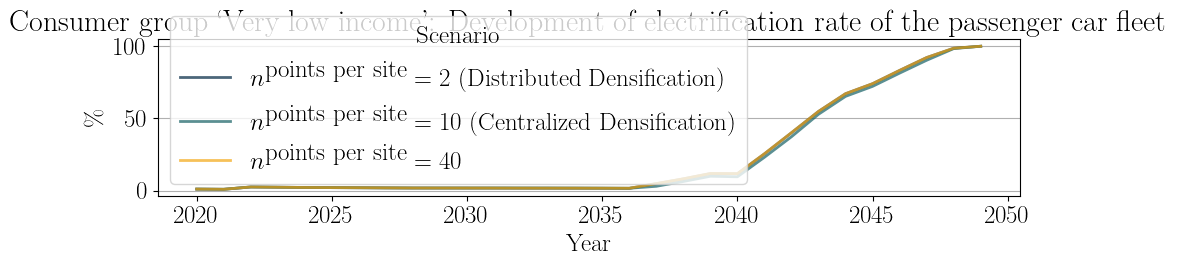

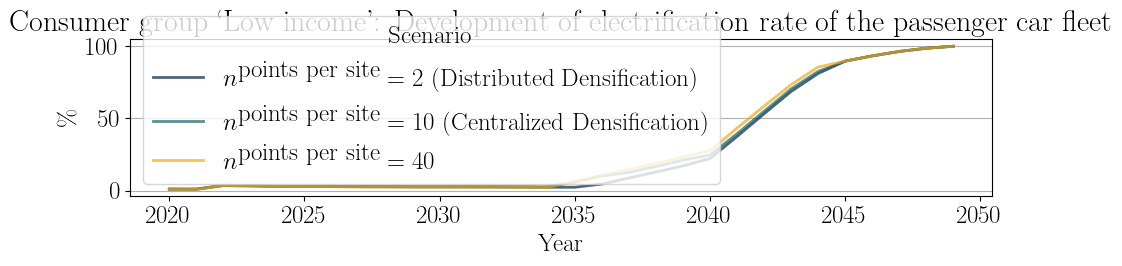

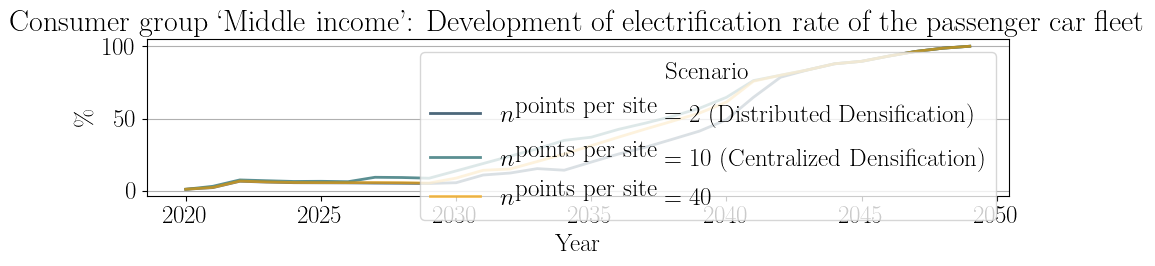

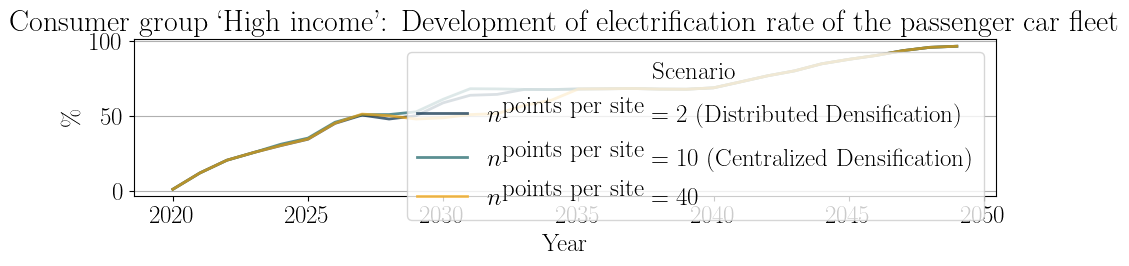

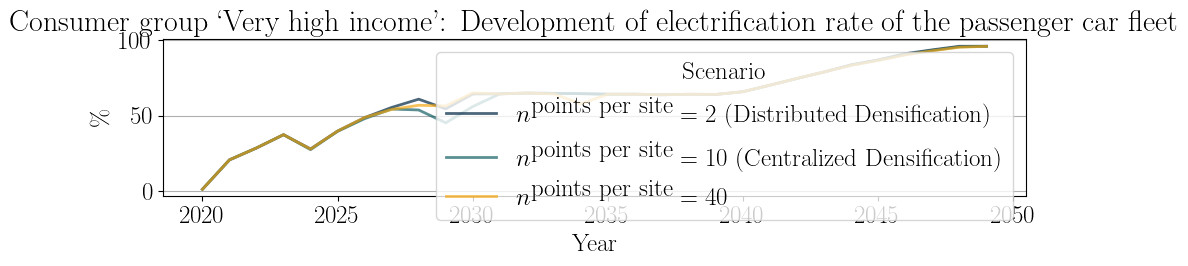

In [13]:
import numpy as np
import matplotlib.pyplot as plt

income_classes = ['First quintile', 'Second quintile', 'Third quintile', 'Fourth quintile', 'Fifth quintile']
actual_labels = {
    "Distributed Densification": r"$n^{\textrm{points per site}} = 2$ (Distributed Densification)",
    "Balanced Densification": r"$n^{\textrm{points per site}} = 10$ (Centralized Densification)",
    "Centralized Densification": r"$n^{\textrm{points per site}} = 40$"
}
case_studies = list(actual_labels.keys())
colors_by_case = {
    "Distributed Densification": "#002642",
    "Balanced Densification": "#156064",
    "Centralized Densification": "#f3a712"
}
income_class_labels = {
    "First quintile": "Very low income",
    "Second quintile": "Low income",
    "Third quintile": "Middle income",
    "Fourth quintile": "High income",
    "Fifth quintile": "Very high income"
}
for fs in income_classes:
    plt.figure(figsize=(10, 3))
    for case_study in case_studies:
        y_vals = [tech_split_per_case_study[year][case_study].get(fs, 0) * 100 for year in years_to_calc]
        plt.plot(years_to_calc, y_vals, label=actual_labels[case_study], color=colors_by_case[case_study], linewidth=2, alpha=0.7)
    plt.xlabel("Year")
    plt.ylabel("\%")
    plt.title(f"Consumer group `{income_class_labels[fs]}': Development of electrification rate of the passenger car fleet")
    plt.legend(title="Scenario")
    plt.grid(True, axis='y', zorder=-1)
    plt.tight_layout()
    plt.savefig(f"rq1_electrification_rate_development_{fs.replace(' ', '_').lower()}.pdf", bbox_inches="tight")
    plt.show()

<>:80: SyntaxWarning: invalid escape sequence '\%'
<>:81: SyntaxWarning: invalid escape sequence '\%'
<>:99: SyntaxWarning: invalid escape sequence '\%'
<>:100: SyntaxWarning: invalid escape sequence '\%'
<>:80: SyntaxWarning: invalid escape sequence '\%'
<>:81: SyntaxWarning: invalid escape sequence '\%'
<>:99: SyntaxWarning: invalid escape sequence '\%'
<>:100: SyntaxWarning: invalid escape sequence '\%'
C:\Users\simuser\AppData\Local\Temp\ipykernel_34268\3858692617.py:80: SyntaxWarning: invalid escape sequence '\%'
  plt.ylabel("\%")
C:\Users\simuser\AppData\Local\Temp\ipykernel_34268\3858692617.py:81: SyntaxWarning: invalid escape sequence '\%'
  plt.title("Differences in Electrification Share by Income Class between scenarios on spatial densification\n[Distributed Expansion (\%) - Concentrated Expansion (\%)]", fontsize=14)
C:\Users\simuser\AppData\Local\Temp\ipykernel_34268\3858692617.py:99: SyntaxWarning: invalid escape sequence '\%'
  plt.ylabel("\%")
C:\Users\simuser\AppData\L

{2020: {'Fifth quintile': 0.0, 'First quintile': 0.0, 'Second quintile': 0.0, 'Fourth quintile': 0.0, 'Third quintile': 4.103119470741205e-05, 'Commercial': 0.0}, 2021: {'Fifth quintile': 0.0, 'First quintile': 0.0, 'Second quintile': 0.0, 'Fourth quintile': 0.0, 'Third quintile': -0.001240310784913292, 'Commercial': 9.58016176737797e-05}, 2022: {'Fifth quintile': -2.8080600784963217e-05, 'First quintile': 0.0, 'Second quintile': 0.0, 'Fourth quintile': 0.0, 'Third quintile': -0.0012631361994624446, 'Commercial': -0.00018357507683888774}, 2023: {'Fifth quintile': 0.0001177807884701898, 'First quintile': 0.0, 'Second quintile': 0.0, 'Fourth quintile': 5.597915334032422e-05, 'Third quintile': -0.001277406156380445, 'Commercial': -0.00035428744692539427}, 2024: {'Fifth quintile': 0.0014043829332002766, 'First quintile': 0.0, 'Second quintile': 0.0, 'Fourth quintile': -0.0011801395810469018, 'Third quintile': -0.0013428412845220838, 'Commercial': -0.0011603828848472386}, 2025: {'Fifth quin

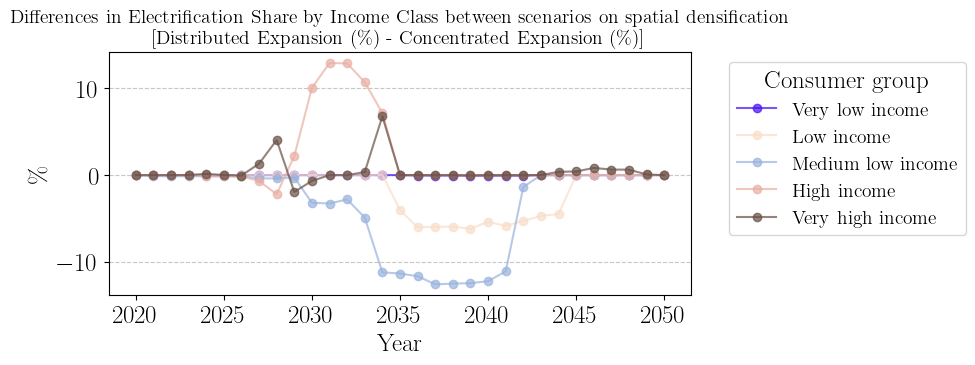

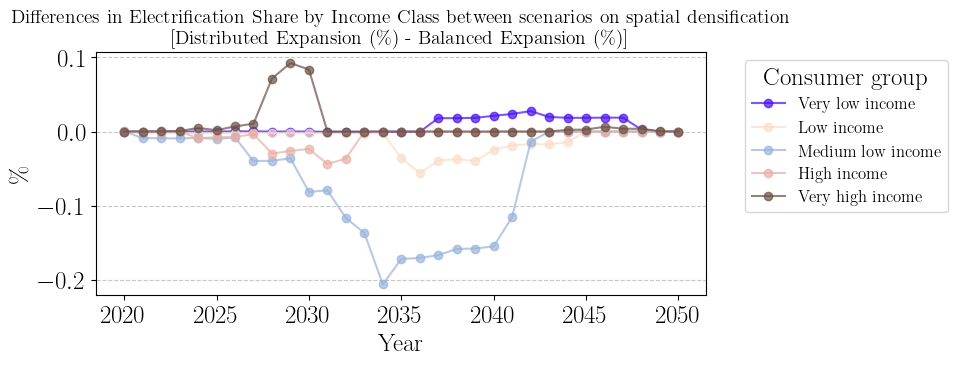

In [14]:
# Find the maximum difference in electrification share between case studies for each income class (fs) and year (2020-2050)

max_diff_by_year_fs = {}

for year in range(2020, 2051):
    max_diff_by_year_fs[year] = {}
    # Get all financial status keys (fs) for this year (from any case)
    fs_keys = set()
    if year in tech_split_per_case_study:
        for case in tech_split_per_case_study[year]:
            fs_keys.update(tech_split_per_case_study[year][case].keys())
        for fs in fs_keys:
            # Calculate the difference between Concentrated and Distributed densification cases
            concentrated_value = tech_split_per_case_study[year].get("Centralized Densification", {}).get(fs, 0.0)
            distributed_value = tech_split_per_case_study[year].get("Distributed Densification", {}).get(fs, 0.0)
            diff = distributed_value - concentrated_value
            max_diff_by_year_fs[year][fs] = diff

print(max_diff_by_year_fs)
# Example: print maximum differences for all years
max_diff = 0
for year in range(2020, 2051):
    for fs, diff in max_diff_by_year_fs[year].items():
        if diff > max_diff:
            max_diff = diff
            print(f"  {fs}: {diff:.4f}", year)


# Print the overall maximum difference across all years and income classes
overall_max_diff = max(
    diff
    for year_dict in max_diff_by_year_fs.values()
    for diff in year_dict.values()
)
# Find the corresponding year and fs for the overall maximum difference, ignoring "Commercial"
max_year_fs = None
for year, year_dict in max_diff_by_year_fs.items():
    for fs, diff in year_dict.items():
        if fs == "Commercial":
            continue
        if diff == overall_max_diff:
            max_year_fs = (year, fs)
            break
    if max_year_fs:
        break

print(f"Overall maximum difference in electrification share (excluding 'Commercial'): {overall_max_diff:.4f}")

income_class_labels = {
    "First quintile": "Very low income",
    "Second quintile": "Low income",
    "Third quintile": "Medium low income",
    "Fourth quintile": "High income",
    "Fifth quintile": "Very high income"
}
colors_by_ic = {
    "Very low income": "#470FF4",
    "Low income": "#F9DEC9",
    "Medium low income": "#99B2DD",
    "High income": "#E9AFA3",
    "Very high income": "#685044"
}
import matplotlib.pyplot as plt

# Prepare data for plotting
# Ensure the year 2020 exists in max_diff_by_year_fs before accessing it
income_classes = [fs for fs in max_diff_by_year_fs.get(2020, {}).keys() if fs != "Commercial"]
years = list(max_diff_by_year_fs.keys())

# Ensure the year exists in max_diff_by_year_fs before accessing it
data = {fs: [max_diff_by_year_fs.get(year, {}).get(fs, 0.0)*100 for year in years] for fs in income_classes}

# Plot
plt.figure(figsize=(10, 4))
for fs in income_class_labels.keys():
    values = data.get(fs, [])
    plt.plot(years, values, label=income_class_labels.get(fs, fs), marker='o', color=colors_by_ic.get(income_class_labels.get(fs, fs), 'gray'), alpha=0.7)

plt.xlabel("Year")
plt.ylabel("\%")
plt.title("Differences in Electrification Share by Income Class between scenarios on spatial densification\n[Distributed Expansion (\%) - Concentrated Expansion (\%)]", fontsize=14)
plt.legend(title="Consumer group", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=14)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig("rq1_max_diff_electrification_share_by_income_class.pdf", bbox_inches="tight")
# Ensure the year exists in tech_split_per_case_study before accessing it
data_balanced_diff = {fs: [
    tech_split_per_case_study.get(year, {}).get("Distributed Densification", {}).get(fs, 0.0) -
    tech_split_per_case_study.get(year, {}).get("Balanced Densification", {}).get(fs, 0.0)
    for year in years] for fs in income_classes}

# Plot
plt.figure(figsize=(10, 4))
for fs in income_class_labels.keys():
    values = data_balanced_diff.get(fs, [])
    plt.plot(years, values, label=income_class_labels.get(fs, fs), marker='o', color=colors_by_ic.get(income_class_labels.get(fs, fs), 'gray'), alpha=0.7)

plt.xlabel("Year")
plt.ylabel("\%")
plt.title("Differences in Electrification Share by Income Class between scenarios on spatial densification\n[Distributed Expansion (\%) - Balanced Expansion (\%)]", fontsize=14)
plt.legend(title="Consumer group", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig("rq1_diff_electrification_share_distributed_vs_balanced.pdf", bbox_inches="tight")
plt.show()

In [15]:
# plotting the fueling allocation
year = 2035
fueled_energy_by_fs = {}
for case_study_name, output_data in case_study_output.items():
    input_data = case_study_input[case_study_name]

    s = output_data["s"]
    financial_status = input_data["FinancialStatus"]
    odpair_list = input_data["Odpair"]
    financial_status_dict = {item["name"]: item for item in financial_status}
    odpair_list_dict = {item["id"]: item for item in odpair_list}
    techvehicle_list = input_data["TechVehicle"]
    fuel_list = input_data["Fuel"]
    geographic_elements = input_data["GeographicElement"]
    geographic_elements_dict = {item["id"]: item for item in geographic_elements}
    techvehicle_list_dict = {item["id"]: item for item in techvehicle_list}
    fuel_list_dict = {item["id"]: item for item in fuel_list}
    l = input_data["FuelingInfrTypes"]
    l_dict = {item["id"]: item for item in l}
    fueled_energy_by_fs_by_cs = {}
    for fs in financial_status_dict.keys():
        for l in l_dict.keys():
            energy_total = sum([s.get((year, (1, r, odpair_list_dict[r]["path_id"], geo), tv, (f, l), g)) for geo in geographic_elements_dict.keys() for f in fuel_list_dict.keys() for r in odpair_list_dict.keys() for tv in techvehicle_list_dict.keys() for g in range(g_init, year) if (year, (1, r, odpair_list_dict[r]["path_id"], geo), tv, (f, l), g) in s and fs == odpair_list_dict[r]["financial_status"]])
            # if case_study_name == "Centralized Densification":
            #     # print("Energy total for fs:", fs, "and l:", l, "is", energy_total)
            #     fueled_energy_by_fs_by_cs[(fs, l)] = energy_total * 1000
            # else:
                # print("Energy total for fs:", fs, "and l:", l, "is", energy_total)
            fueled_energy_by_fs_by_cs[(fs, l)] = energy_total
    
    
    fueled_energy_by_fs[case_study_name] = fueled_energy_by_fs_by_cs




{'Distributed Densification': {('First quintile', 0): 0.0, ('First quintile', 1): 0.0, ('First quintile', 2): 0.571311, ('First quintile', 3): 2458.481104, ('First quintile', 4): 384847.990895, ('Second quintile', 0): 0.0, ('Second quintile', 1): 0.005771, ('Second quintile', 2): 0.19044000000000003, ('Second quintile', 3): 4306.012034, ('Second quintile', 4): 476442.757262, ('Third quintile', 0): 0.0, ('Third quintile', 1): 0.0, ('Third quintile', 2): 0.27508000000000005, ('Third quintile', 3): 36307.716683, ('Third quintile', 4): 460238.666014, ('Fourth quintile', 0): 71596.991276, ('Fourth quintile', 1): 0.0, ('Fourth quintile', 2): 0.0, ('Fourth quintile', 3): 59766.957309, ('Fourth quintile', 4): 214233.606561, ('Fifth quintile', 0): 59131.906734000004, ('Fifth quintile', 1): 26163.460897, ('Fifth quintile', 2): 0.0, ('Fifth quintile', 3): 55356.438305, ('Fifth quintile', 4): 265511.7683, ('Commercial', 0): 0.0, ('Commercial', 1): 18338.728076, ('Commercial', 2): 0.0, ('Commercial

NameError: name 'fueling_type_labels' is not defined

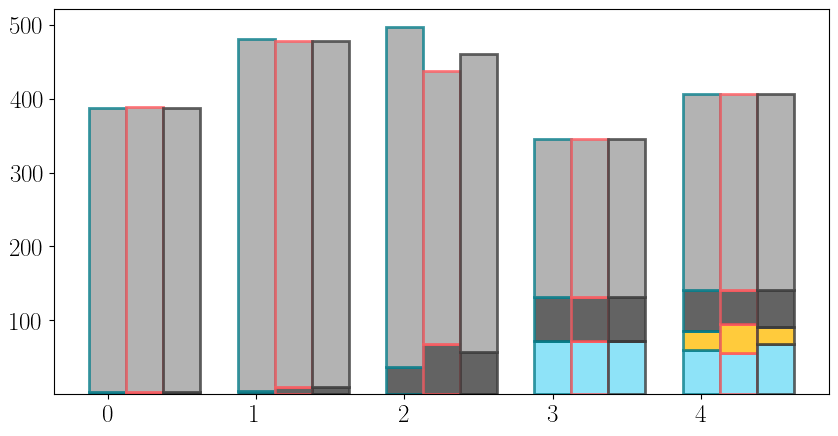

In [16]:
from matplotlib.patches import Patch

print(fueled_energy_by_fs)
# No additional code is needed here; the existing code is complete and functional.
# Prepare data for plotting
income_classes = ['First quintile', 'Second quintile', 'Third quintile', 'Fourth quintile', 'Fifth quintile']
case_studies = list(fueled_energy_by_fs.keys())
fueling_type_ids = list(l_dict.keys())  # All fueling types

# Get fueling type names for legend
fueling_type_names = [l_dict[lid]['fueling_type'] for lid in fueling_type_ids]
fueling_type_colors = {
    'home': '#72DDF7',
    'work': '#FFBE0B',
    'public_fast': '#C1839F',
    'public_slow': '#3C3C3C',
    'public_fossil': '#A0A0A0'
}
case_study_colors = {
    "Distributed Densification": "#087E8B",
    "Balanced Densification": "#FF5A5F",
    "Centralized Densification": "#3C3C3C"
}
# Prepare data: dict[case][fueling_type][income_class]
data = {case: {ftype: [] for ftype in fueling_type_ids} for case in case_studies}
for case in case_studies:
    for lid in fueling_type_ids:
        for fs in income_classes:
            value = fueled_energy_by_fs[case].get((fs, lid), 0)
            data[case][lid].append(value)

x = np.arange(len(income_classes))
width = 0.25

fig, ax = plt.subplots(figsize=(10, 5))
for i, case in enumerate(case_studies):
    bottom = np.zeros(len(income_classes))
    for lid in fueling_type_ids:
        values = np.array(data[case][lid]) * 1e-3
        color = fueling_type_colors.get(l_dict[lid]['fueling_type'], None)
        ax.bar(x + i * width, values, width=width, bottom=bottom, 
               label=l_dict[lid]['fueling_type'] if i == 0 else "", 
               color=color, alpha=0.8, edgecolor=case_study_colors.get(case, "black"), linewidth=2)
        bottom += values

# Custom legend for fueling types
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))

fueling_type_handles = [
    Patch(facecolor=fueling_type_colors[l_dict[lid]['fueling_type']],
          label=l_dict[lid]['fueling_type'],
          edgecolor='none')
    for lid in fueling_type_ids
]
fueled_energy_by_income_fuelingtype_casestudyfueling_type_labels = [l_dict[lid]['fueling_type'] for lid in fueling_type_ids]

case_patches = [Patch(facecolor='white', edgecolor=case_study_colors[cs], linewidth=2, label=cs) for cs in case_studies]
case_labels = case_studies

combined_handles = fueling_type_handles + case_patches
combined_labels = fueling_type_labels + case_labels

ax.legend(combined_handles, combined_labels, title="Fueling type / Roll-out strategy", bbox_to_anchor=(1.05, 1), loc='upper left')

ax.set_xticks(x + width)
ax.set_xticklabels([Income_level_labels[fs] for fs in income_classes], rotation=30)
ax.set_ylabel("Fueled energy (GWh)")
ax.set_title("Fueled energy by income class, roll-out strategy, and fueling type")
ax.text(0.5, 50, "oasch", ha='center', va='bottom', fontsize=0.5, fontweight='bold')
plt.grid(True, axis='y', zorder=-1)
plt.xlabel("Consumer group by income level")
plt.show()

fig.savefig(".pdf", bbox_inches="tight")


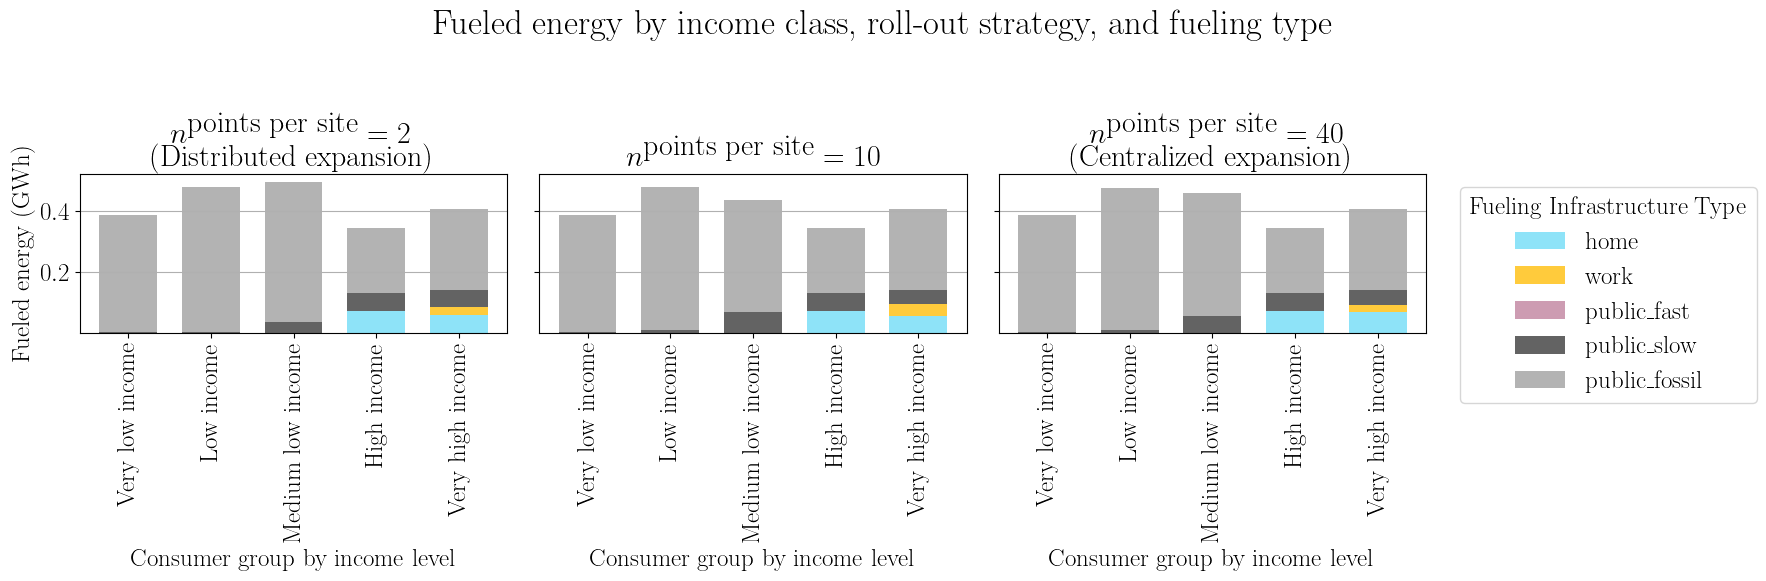

In [ ]:
# Plot stacked bars for each case study as subplots in a single figure

# Plot fueled energy by income class, roll-out strategy, and fueling type as subplots
actual_labels = {"Distributed Densification": r"$n^{\textrm{points per site}} = 2$\newline(Distributed expansion)",
                 "Centralized Densification": r"$n^{\textrm{points per site}} = 40$\newline(Centralized expansion)",
                 "Balanced Densification": r"$n^{\textrm{points per site}} = 10$\\"}
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
case_studies = list(fueled_energy_by_fs.keys())
income_classes = ['First quintile', 'Second quintile', 'Third quintile', 'Fourth quintile', 'Fifth quintile']
fueling_type_ids = list(l_dict.keys())
fueling_type_colors = {
    'home': '#72DDF7',
    'work': '#FFBE0B',
    'public_fast': '#C1839F',
    'public_slow': '#3C3C3C',
    'public_fossil': '#A0A0A0'
}

for idx, case in enumerate(case_studies):
    ax = axes[idx]
    bottom = np.zeros(len(income_classes))
    for lid in fueling_type_ids:
        # Scale values to 10^-6 (i.e., from Wh to GWh if original is Wh)
        # Ensure the key exists in the dictionary before accessing it
        values = np.array([fueled_energy_by_fs.get(case, {}).get((fs, lid), 0) for fs in income_classes]) * 1e-6
        color = fueling_type_colors.get(l_dict[lid]['fueling_type'], None)
        ax.bar(np.arange(len(income_classes)), values, width=0.7, bottom=bottom, 
               label=l_dict[lid]['fueling_type'], color=color, alpha=0.8)
        bottom += values
    ax.set_title(actual_labels[case])
    ax.set_xticks(np.arange(len(income_classes)))
    ax.set_xticklabels([Income_level_labels[fs] for fs in income_classes], rotation=90)
    if idx == 0:
        ax.set_ylabel("Fueled energy (GWh)")
    ax.set_xlabel("Consumer group by income level")
    ax.grid(axis='y', zorder=-1)
    if idx == 2:
        ax.legend(title="Fueling Infrastructure Type", bbox_to_anchor=(1.05, 1), loc='upper left')

fig.suptitle("Fueled energy by income class, roll-out strategy, and fueling type", fontsize=25)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

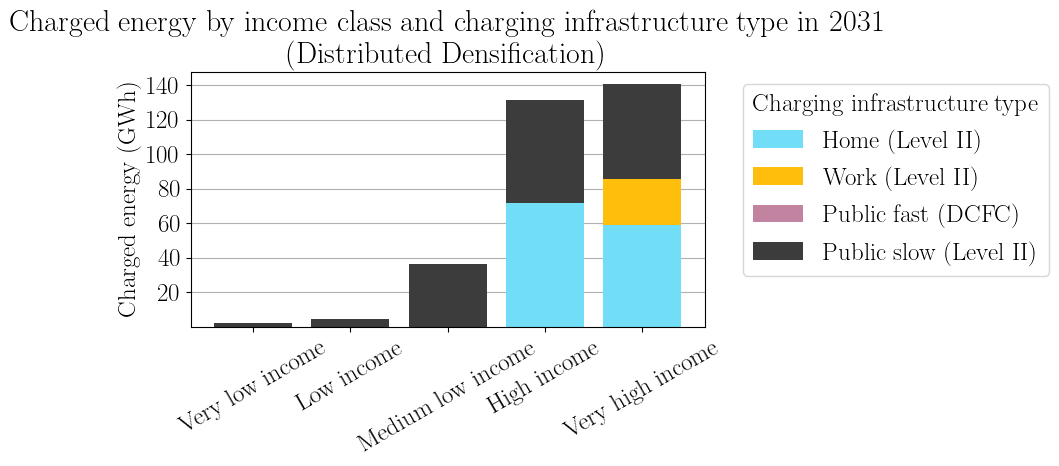

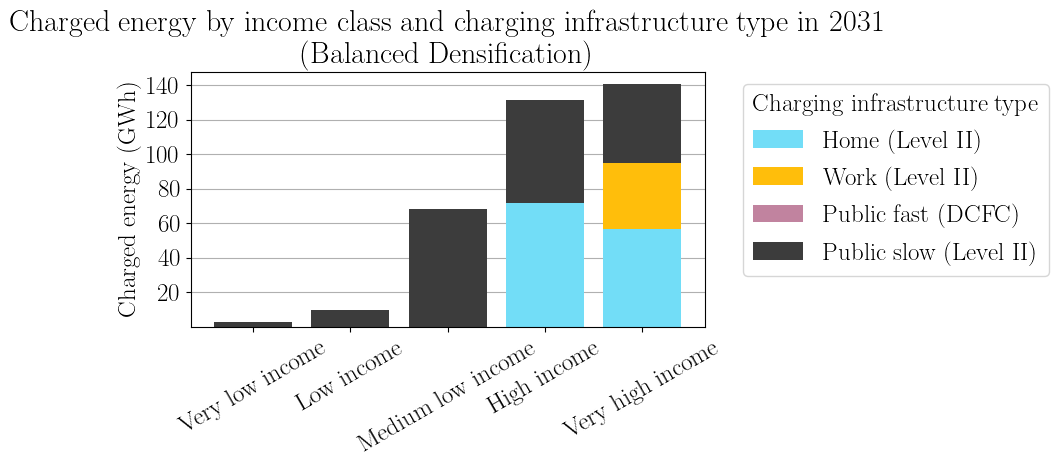

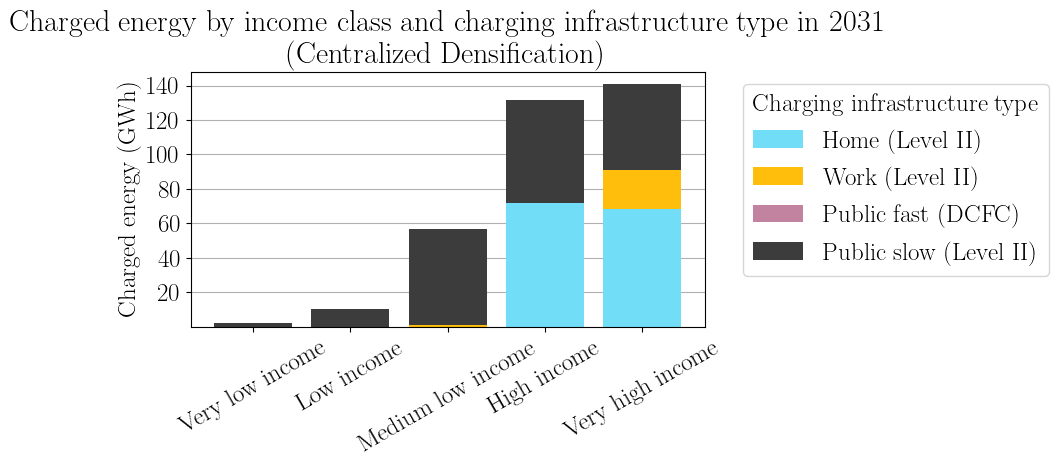

In [ ]:
import numpy as np

import matplotlib.pyplot as plt

# Define fueling types to ignore fossil fuel
fueling_type_names = [l_dict[lid]['fueling_type'] for lid in l_dict if l_dict[lid]['fueling_type'] != 'public_fossil']
fueling_type_ids = [lid for lid in l_dict if l_dict[lid]['fueling_type'] != 'public_fossil']
fueling_type_colors = {
    'home': '#72DDF7',
    'work': '#FFBE0B',
    'public_fast': '#C1839F',
    'public_slow': '#3C3C3C'
}
fueling_type_labels={
    'home': 'Home (Level II)',
    'work': 'Work (Level II)',
    'public_fast': 'Public fast (DCFC)',
    'public_slow': 'Public slow (Level II)',
}

income_classes = ['First quintile', 'Second quintile', 'Third quintile', 'Fourth quintile', 'Fifth quintile']
case_studies = list(fueled_energy_by_fs.keys())

for case in case_studies:
    # Prepare data for each fueling type (ignore fossil)
    data = []
    for lid in fueling_type_ids:
        values = [fueled_energy_by_fs[case].get((fs, lid), 0) * 1e-3 for fs in income_classes]  # Convert to GWh
        data.append(values)
    data = np.array(data)

    fig, ax = plt.subplots(figsize=(10, 5))
    x = np.arange(len(income_classes))
    bottom = np.zeros(len(income_classes))
    for idx, lid in enumerate(fueling_type_ids):
        ax.bar(x, data[idx], bottom=bottom, label=fueling_type_labels[l_dict[lid]['fueling_type']], color=fueling_type_colors[l_dict[lid]['fueling_type']])
        bottom += data[idx]

    ax.set_xticks(x)
    ax.set_xticklabels([Income_level_labels[fs] for fs in income_classes], rotation=30)
    ax.yaxis.set_major_locator(plt.MaxNLocator(nbins=8))
    ax.set_ylabel("Charged energy (GWh)")
    ax.set_title(f"Charged energy by income class and charging infrastructure type in {year}\n({case})")
    ax.legend(title="Charging infrastructure type", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    ax.set_axisbelow(True)
    plt.grid(True, axis='y', zorder=-1)
    # plt.show()
    fig.savefig(f"fueled_energy_by_income_and_charging_type_{case}.pdf", bbox_inches="tight")

In [ ]:
# Calculate and store fueled energy for 2030 and 2040
years_to_plot = [2030, 2040, 2050]
fueled_energy_by_fs = {year: {} for year in years_to_plot}

for year in years_to_plot:
    for case_study_name, output_data in case_study_output.items():
        input_data = case_study_input[case_study_name]

        s = output_data["s"]
        financial_status = input_data["FinancialStatus"]
        odpair_list = input_data["Odpair"]
        financial_status_dict = {item["name"]: item for item in financial_status}
        odpair_list_dict = {item["id"]: item for item in odpair_list}
        techvehicle_list = input_data["TechVehicle"]
        fuel_list = input_data["Fuel"]
        geographic_elements = input_data["GeographicElement"]
        geographic_elements_dict = {item["id"]: item for item in geographic_elements}
        techvehicle_list_dict = {item["id"]: item for item in techvehicle_list}
        fuel_list_dict = {item["id"]: item for item in fuel_list}
        l = input_data["FuelingInfrTypes"]
        l_dict = {item["id"]: item for item in l}
        fueled_energy_by_fs_by_cs = {}
        for fs in financial_status_dict.keys():
            for l in l_dict.keys():
                energy_total = sum([
                    s.get((year, (1, r, odpair_list_dict[r]["path_id"], geo), tv, (f, l), g))
                    for geo in geographic_elements_dict.keys()
                    for f in fuel_list_dict.keys()
                    for r in odpair_list_dict.keys()
                    for tv in techvehicle_list_dict.keys()
                    for g in range(g_init, year)
                    if (year, (1, r, odpair_list_dict[r]["path_id"], geo), tv, (f, l), g) in s
                    and fs == odpair_list_dict[r]["financial_status"]
                ])
                fueled_energy_by_fs_by_cs[(fs, l)] = energy_total
        fueled_energy_by_fs[year][case_study_name] = fueled_energy_by_fs_by_cs


In [ ]:
print(fueled_energy_by_fs[years_to_plot[0]])

{'Distributed Densification': {('First quintile', 0): 0.0, ('First quintile', 1): 0.0, ('First quintile', 2): 0.40204, ('First quintile', 3): 2626.509363, ('First quintile', 4): 423767.00626, ('Second quintile', 0): 0.0, ('Second quintile', 1): 0.0, ('Second quintile', 2): 0.332789, ('Second quintile', 3): 4662.07588, ('Second quintile', 4): 518609.326031, ('Third quintile', 0): 0.0, ('Third quintile', 1): 109.45912200000001, ('Third quintile', 2): 0.38088000000000005, ('Third quintile', 3): 11806.813543, ('Third quintile', 4): 589649.014926, ('Fourth quintile', 0): 76065.573722, ('Fourth quintile', 1): 0.0, ('Fourth quintile', 2): 0.0, ('Fourth quintile', 3): 50133.388304, ('Fourth quintile', 4): 290776.790164, ('Fifth quintile', 0): 82166.046766, ('Fifth quintile', 1): 46884.321715, ('Fifth quintile', 2): 0.0, ('Fifth quintile', 3): 28287.169084999998, ('Fifth quintile', 4): 298499.45761, ('Commercial', 0): 0.0, ('Commercial', 1): 21971.947159, ('Commercial', 2): 0.0, ('Commercial', 

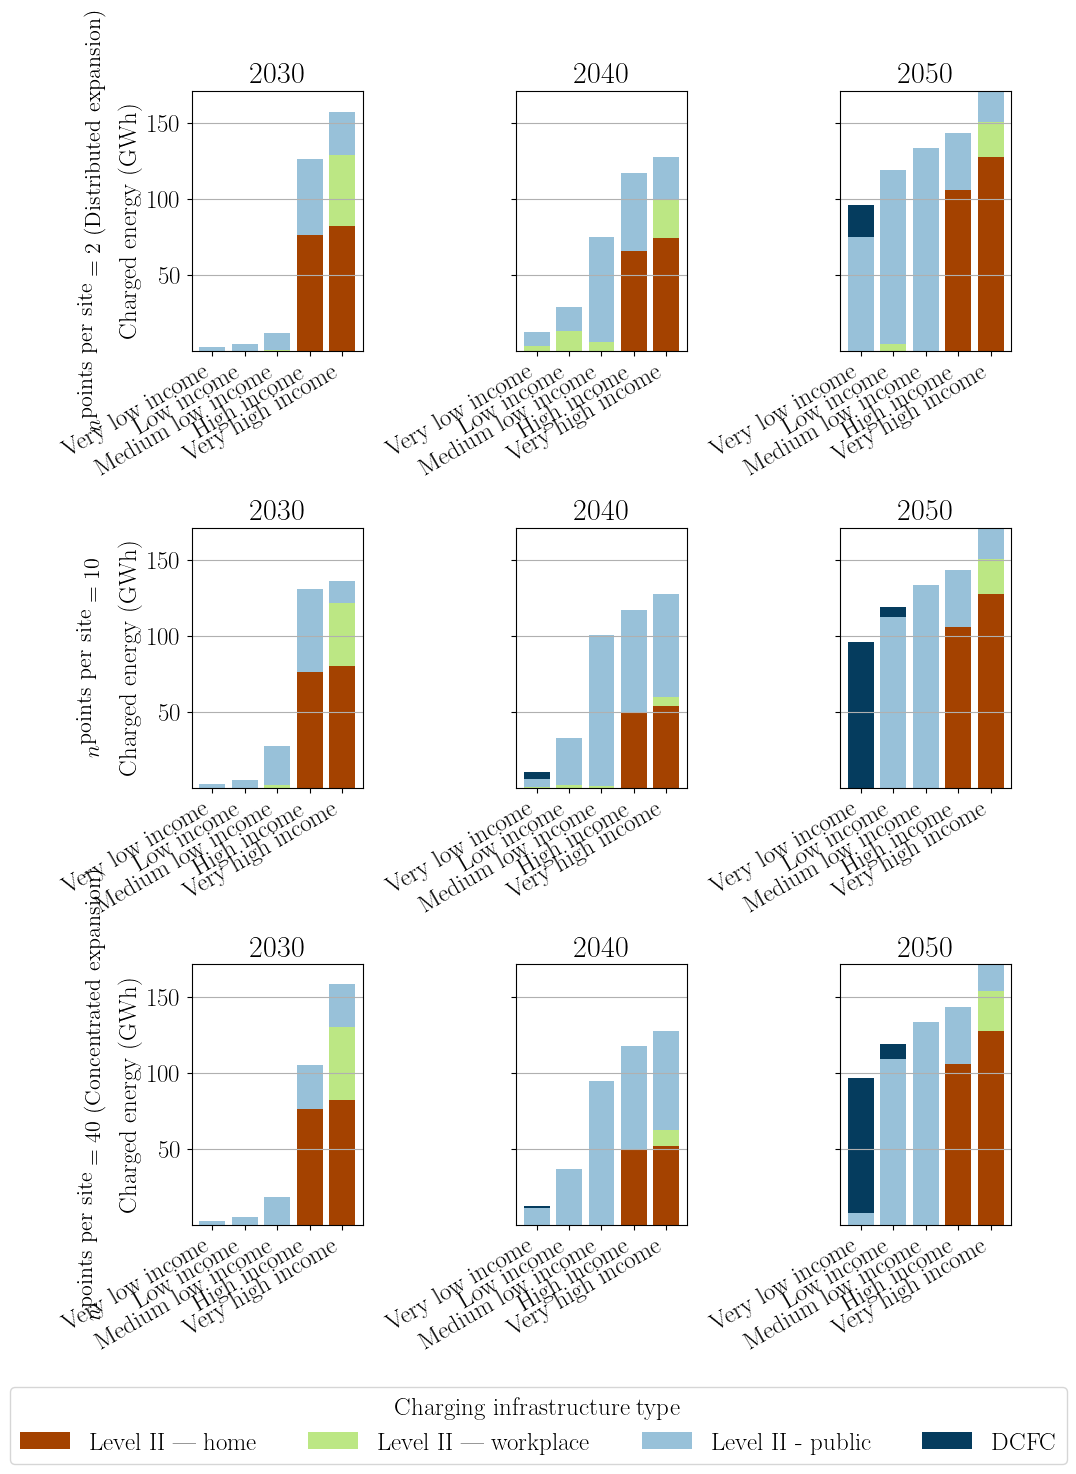

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

fig, axes = plt.subplots(
    len(fueled_energy_by_fs[years_to_plot[0]].keys()),  # rows: case studies
    len(years_to_plot),                                 # columns: years
    figsize=(10, 14),
    sharey=True
)

fueling_type_colors = {
    'home': '#a44200',
    'work': '#bce784',
    'public_slow': '#98c1d9',
    'public_fast': '#053c5e',
}
fueling_type_labels = {
    'home': 'Level II --- home',
    'work': 'Level II --- workplace',
    'public_slow': 'Level II - public',
    'public_fast': 'DCFC',
}
correct_cs_labels = {
    "home"
}
# Specify the desired order
ordered_fueling_types = ['home', 'work', 'public_slow', 'public_fast']
ordered_fueling_type_ids = [lid for ft in ordered_fueling_types for lid in fueling_type_ids if l_dict[lid]['fueling_type'] == ft]
# Specify the desired order of income class levels
ordered_income_classes = ['First quintile', 'Second quintile', 'Third quintile', 'Fourth quintile', 'Fifth quintile']
actual_labels = {
    "Distributed Densification": r"$n^{\textrm{points per site}} = 2$ (Distributed expansion)",
    "Balanced Densification": r"$n^{\textrm{points per site}} = 10$",
    "Centralized Densification": r"$n^{\textrm{points per site}} = 40$ (Concentrated expansion)"
}

# Ensure income classes are ordered correctly
income_classes = ordered_income_classes
case_studies = list(fueled_energy_by_fs[years_to_plot[0]].keys())

for row_idx, case in enumerate(case_studies):
    for col_idx, year in enumerate(years_to_plot):
        ax = axes[row_idx, col_idx] if len(case_studies) > 1 else axes[col_idx]
        bottom = np.zeros(len(income_classes))
        for l_id in ordered_fueling_type_ids:
            values = [
                fueled_energy_by_fs[year][case].get((fs, l_id), 0) * 1e-3
                for fs in income_classes
            ]
            ax.bar(
                np.arange(len(income_classes)), values, bottom=bottom,
                label=fueling_type_labels[l_dict[l_id]['fueling_type']],
                color=fueling_type_colors[l_dict[l_id]['fueling_type']]
            )
            bottom += values
        ax.set_title(f"{year}")
        ax.set_xticks(np.arange(len(income_classes)))
        ax.set_xticklabels([Income_level_labels[fs] for fs in income_classes], rotation=30, ha='right')
        if col_idx == 0:
            ax.set_ylabel("Charged energy (GWh)")
        ax.grid(axis='y', zorder=-1)

plt.tight_layout()
plt.subplots_adjust(bottom=0.15)
for row_idx, case in enumerate(case_studies):
    row_axes = axes[row_idx, :] if len(case_studies) > 1 else [axes[row_idx]]
    pos_row = [ax.get_position() for ax in row_axes]
    y_mid = (min(p.y0 for p in pos_row) + max(p.y1 for p in pos_row)) / 2
    x_left = pos_row[0].x0 - 0.10
    fig.text(
        x_left, y_mid,
        actual_labels[case],
        va='center', ha='center',
        fontsize=16, fontweight='bold',
        rotation=90
    )

handles, labels = axes[0, 0].get_legend_handles_labels() if len(case_studies) > 1 else axes[0].get_legend_handles_labels()
fig.legend(handles, labels, title="Charging infrastructure type", bbox_to_anchor=(0.5, -0.03), loc='lower center', ncol=len(fueling_type_ids))

plt.show()
fig.savefig("rq_1_fueled_energy_by_income_class_and_year_grid.pdf", bbox_inches="tight")


In [ ]:
for year in [2030, 2040]:
    print(f"Year: {year}")
    for case_study, yearly_data in q_fuel_by_type_by_year_by_case_study.items():
        total_energy = sum([yearly_data[year][l_id] for l_id in ordered_fueling_type_ids])
        print(f"  {case_study}:")
        for l_id, l_type in zip(ordered_fueling_type_ids, ordered_fueling_types):
            energy = yearly_data[year][l_id]
            rel = energy / total_energy if total_energy > 0 else 0
            print(f"    {l_type}: {rel:.2%}")

Year: 2030


NameError: name 'q_fuel_by_type_by_year_by_case_study' is not defined

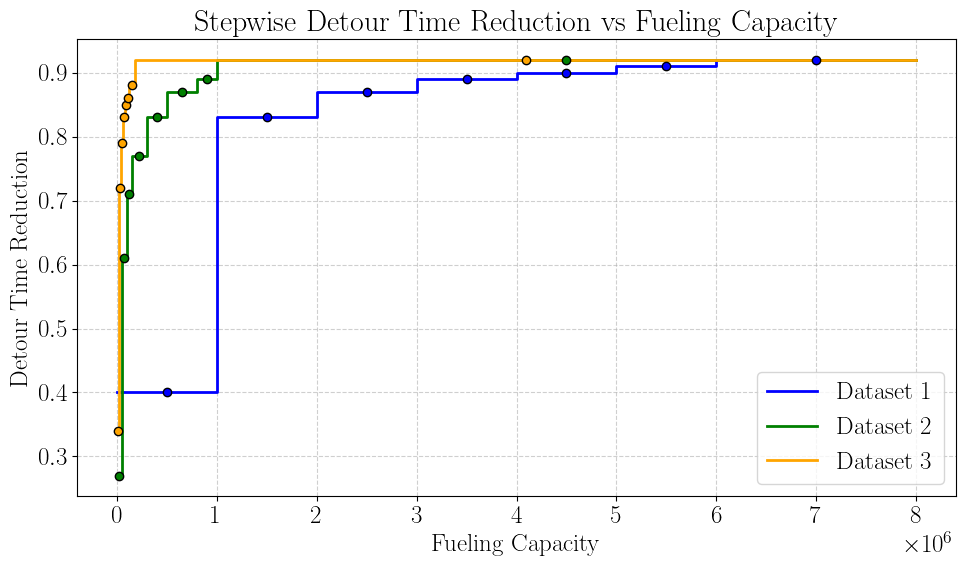

In [ ]:
import matplotlib.pyplot as plt

# Dataset 1
DetourTimeReduction1 = [
    {"detour_time_reduction": 0.4,  "fueling_cap_lb": 0,        "fueling_cap_ub": 1000000},
    {"detour_time_reduction": 0.83, "fueling_cap_lb": 1000000,  "fueling_cap_ub": 2000000},
    {"detour_time_reduction": 0.87, "fueling_cap_lb": 2000000,  "fueling_cap_ub": 3000000},
    {"detour_time_reduction": 0.89, "fueling_cap_lb": 3000000,  "fueling_cap_ub": 4000000},
    {"detour_time_reduction": 0.9,  "fueling_cap_lb": 4000000,  "fueling_cap_ub": 5000000},
    {"detour_time_reduction": 0.91, "fueling_cap_lb": 5000000,  "fueling_cap_ub": 6000000},
    {"detour_time_reduction": 0.92, "fueling_cap_lb": 6000000,  "fueling_cap_ub": 8000000},
]

# Dataset 2
DetourTimeReduction2 = [
    {"detour_time_reduction": 0.27, "fueling_cap_lb": 0,        "fueling_cap_ub": 50000},
    {"detour_time_reduction": 0.61, "fueling_cap_lb": 50000,    "fueling_cap_ub": 100000},
    {"detour_time_reduction": 0.71, "fueling_cap_lb": 100000,   "fueling_cap_ub": 150000},
    {"detour_time_reduction": 0.77, "fueling_cap_lb": 150000,   "fueling_cap_ub": 300000},
    {"detour_time_reduction": 0.83, "fueling_cap_lb": 300000,   "fueling_cap_ub": 500000},
    {"detour_time_reduction": 0.87, "fueling_cap_lb": 500000,   "fueling_cap_ub": 800000},
    {"detour_time_reduction": 0.89, "fueling_cap_lb": 800000,   "fueling_cap_ub": 1000000},
    {"detour_time_reduction": 0.92, "fueling_cap_lb": 1000000,  "fueling_cap_ub": 8000000},
]

# Dataset 3
DetourTimeReduction3 = [
    {"detour_time_reduction": 0.34, "fueling_cap_lb": 0,        "fueling_cap_ub": 20000},
    {"detour_time_reduction": 0.72, "fueling_cap_lb": 20000,    "fueling_cap_ub": 40000},
    {"detour_time_reduction": 0.79, "fueling_cap_lb": 40000,    "fueling_cap_ub": 60000},
    {"detour_time_reduction": 0.83, "fueling_cap_lb": 60000,    "fueling_cap_ub": 80000},
    {"detour_time_reduction": 0.85, "fueling_cap_lb": 80000,    "fueling_cap_ub": 100000},
    {"detour_time_reduction": 0.86, "fueling_cap_lb": 100000,   "fueling_cap_ub": 120000},
    {"detour_time_reduction": 0.88, "fueling_cap_lb": 120000,   "fueling_cap_ub": 180000},
    {"detour_time_reduction": 0.92, "fueling_cap_lb": 180000,   "fueling_cap_ub": 8000000},
]

def plot_stepwise(detour_data, color, label):
    # Stepwise x and y
    x = [d["fueling_cap_lb"] for d in detour_data]
    y = [d["detour_time_reduction"] for d in detour_data]
    x.append(detour_data[-1]["fueling_cap_ub"])
    y.append(detour_data[-1]["detour_time_reduction"])

    # Plot step curve
    plt.step(x, y, where='post', color=color, linewidth=2, label=label)

    # Plot midpoints
    midpoints = [(d["fueling_cap_lb"] + d["fueling_cap_ub"])/2 for d in detour_data]
    plt.scatter(midpoints, y[:-1], color=color, edgecolor='black', zorder=5)

# Plot all three datasets
plt.figure(figsize=(10,6))
plot_stepwise(DetourTimeReduction1, color='blue', label='Dataset 1')
plot_stepwise(DetourTimeReduction2, color='green', label='Dataset 2')
plot_stepwise(DetourTimeReduction3, color='orange', label='Dataset 3')

plt.xlabel("Fueling Capacity")
plt.ylabel("Detour Time Reduction")
plt.title("Stepwise Detour Time Reduction vs Fueling Capacity")
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()


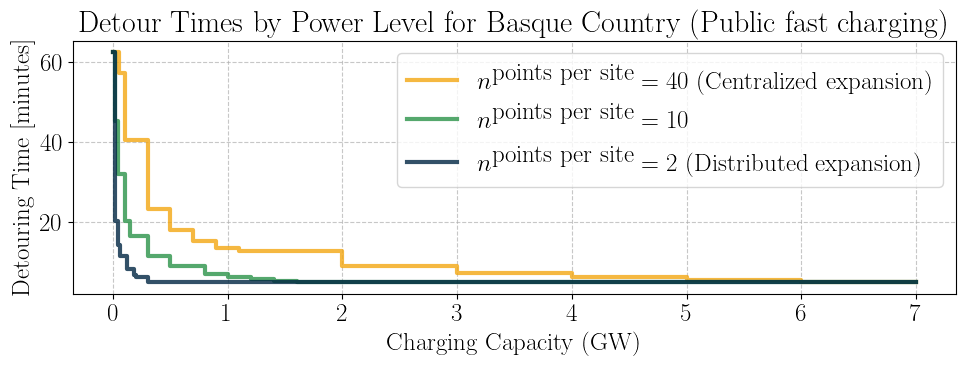

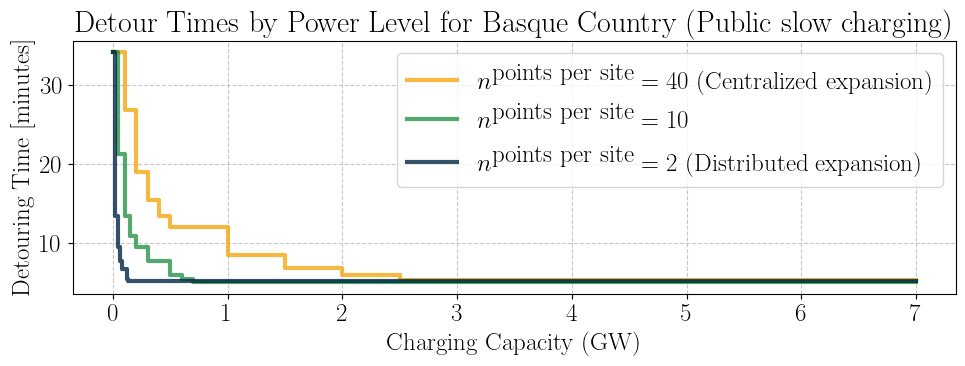

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from io import StringIO

data_str = """charging_speed,strategy,lower_bound,upper_bound,reduction,resulting_min
slow,distributed expansion,0,20000,0.0,34.19709461343171
slow,distributed expansion,20000,40000,0.607335993467148,13.427968182693109
slow,distributed expansion,40000,60000,0.7224973860121728,9.489783146016343
slow,distributed expansion,60000,80000,0.7733785092420237,7.749796560887456
slow,distributed expansion,80000,120000,0.8037760198522146,6.710290014537965
slow,distributed expansion,120000,130000,0.8397837911133031,5.478928853903708
slow,distributed expansion,130000,7000000,0.8460627320482301,5.264207316679861
slow,concentrated expansion,0,100000,0.0,34.19709461343171
slow,concentrated expansion,100000,200000,0.21293645329702096,26.9152865733849
slow,concentrated expansion,200000,300000,0.4446892365054829,18.990014719079
slow,concentrated expansion,300000,400000,0.5462573935134849,15.51667884416447
slow,concentrated expansion,400000,500000,0.607335993467148,13.427968182693109
slow,concentrated expansion,500000,1000000,0.6489452512502953,12.00505245748815
slow,concentrated expansion,1000000,1500000,0.7517668065913442,8.488854001190095
slow,concentrated expansion,1500000,2000000,0.7973184463090616,6.93112026796636
slow,concentrated expansion,2000000,2500000,0.8244726256251477,6.002526228744075
slow,concentrated expansion,2500000,7000000,0.8430035435943102,5.368822673678881
slow,balanced expansion,0,40000,0.0,34.19709461343171
slow,balanced expansion,40000,100000,0.3781154998782229,21.266643089291094
slow,balanced expansion,100000,150000,0.607335993467148,13.427968182693109
slow,balanced expansion,150000,200000,0.6793911812125439,10.963890109975216
slow,balanced expansion,200000,300000,0.7224973860121728,9.489783146016343
slow,balanced expansion,300000,500000,0.7733785092420237,7.749796560887456
slow,balanced expansion,500000,600000,0.8244726256251477,6.002526228744075
slow,balanced expansion,600000,700000,0.8397837911133031,5.478928853903708
slow,balanced expansion,700000,7000000,0.8516569563547883,5.0729010987797345
fast,distributed expansion,0,20000,0.0,62.43506706971652
fast,distributed expansion,20000,40000,0.6759629650796071,20.231274008326807
fast,distributed expansion,40000,60000,0.770871215252208,14.305671043331031
fast,distributed expansion,60000,120000,0.8129171306613029,11.680531494756563
fast,distributed expansion,120000,180000,0.8677124344467705,8.259383027805406
fast,distributed expansion,180000,200000,0.8919876550265358,6.743758002775603
fast,distributed expansion,200000,300000,0.8975304923404039,6.397690583327706
fast,distributed expansion,300000,7000000,0.9163339973465925,5.22369248712058
fast,concentrated expansion,0,50000,0.0,62.43506706971652
fast,concentrated expansion,50000,100000,0.08348486100883207,57.222684173324126
fast,concentrated expansion,100000,300000,0.3519259301592141,40.462548016653614
fast,concentrated expansion,300000,500000,0.6258342613226059,23.361062989513126
fast,concentrated expansion,500000,700000,0.7101724650762112,18.095401581617356
fast,concentrated expansion,700000,900000,0.7550510257216823,15.293405637725037
fast,concentrated expansion,900000,1100000,0.7839753100530713,13.487516005551207
fast,concentrated expansion,1100000,2000000,0.7950609846808081,12.795381166655412
fast,concentrated expansion,2000000,3000000,0.8550862325381057,9.047700790808678
fast,concentrated expansion,3000000,4000000,0.8816784043380077,7.387416760952369
fast,concentrated expansion,4000000,5000000,0.8975304923404039,6.397690583327706
fast,concentrated expansion,5000000,6000000,0.9083484861008831,5.722268417332414
fast,concentrated expansion,6000000,7000000,0.9163339973465925,5.22369248712058
fast,balanced expansion,0,20000,0.0,62.43506706971652
fast,balanced expansion,20000,40000,0.2754311626905281,45.238503954043395
fast,balanced expansion,40000,100000,0.4876524617020201,31.98845291663853
fast,balanced expansion,100000,150000,0.6759629650796071,20.231274008326807
fast,balanced expansion,150000,300000,0.735424868893541,16.51876605561081
fast,balanced expansion,300000,500000,0.8129171306613029,11.680531494756563
fast,balanced expansion,500000,800000,0.8550862325381057,9.047700790808678
fast,balanced expansion,800000,1000000,0.885435607626104,7.152835521665516
fast,balanced expansion,1000000,1200000,0.8975304923404039,6.397690583327706
fast,balanced expansion,1200000,1400000,0.9064585653306515,5.8402657473782815
fast,balanced expansion,1400000,1600000,0.9133974596215562,5.407035416935976
fast,balanced expansion,1600000,7000000,0.9189907412699018,5.057818502081702
"""
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from io import StringIO

# --- your data string here (unchanged) ---
# data_str = """..."""

actual_labels = {
    "Distributed Densification": r"$n^{\textrm{points per site}} = 2$ (Distributed expansion)",
    "Balanced Densification": r"$n^{\textrm{points per site}} = 10$",
    "Centralized Densification": r"$n^{\textrm{points per site}} = 40$ (Centralized expansion)"
}

correct_labels = {
    "distributed expansion": "Distributed Densification",
    "balanced expansion": "Balanced Densification",
    "concentrated expansion": "Centralized Densification"
}

colors_by_case = {
    "Distributed Densification": "#002642",
    "Balanced Densification": "#2b9348",
    "Centralized Densification": "#f3a712"
}

df = pd.read_csv(StringIO(data_str))

def plot_group(df_group, label):
    x = np.array(df_group['lower_bound'].tolist()) * 1e-6
    y = df_group['resulting_min'].tolist()
    x = np.append(x, df_group['upper_bound'].iloc[-1] * 1e-6)
    y = np.append(y, df_group['resulting_min'].iloc[-1])
    return plt.step(x, y, where='post', color=colors_by_case[label],
                    linewidth=3, label=actual_labels[label], alpha=0.8)

# fixed order for plotting and legend
strategy_order = [
    "concentrated expansion",   # Centralized
    "balanced expansion",       # Balanced
    "distributed expansion"     # Distributed
]

for speed in ['fast', 'slow']:
    plt.figure(figsize=(10, 4))
    df_speed = df[df['charging_speed'] == speed]

    handles, labels = [], []
    for strategy in strategy_order:   # enforce desired order
        df_group = df_speed[df_speed['strategy'] == strategy]
        label = correct_labels[strategy]
        h = plot_group(df_group, label)
        handles.append(h[0])
        labels.append(actual_labels[label])

    plt.xlabel("Charging Capacity (GW)")
    plt.ylabel("Detouring Time [minutes]")
    plt.title(f"Detour Times by Power Level for Basque Country (Public {speed} charging)")
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend(handles, labels)
    plt.tight_layout()
    plt.savefig(f"detour_time_reduction_by_capacity_and_strategy_{speed}.pdf",
                bbox_inches="tight")

# Plotting development in charging infrastructures by type 



In [ ]:
def find_matching_dict(target_dict, list_of_dicts):
    """
    Finds and returns the first dictionary in the list that matches
    the target dictionary in terms of all key-value pairs.

    Parameters:
        target_dict (dict): The dictionary to match.
        list_of_dicts (list): List of dictionaries to search.

    Returns:
        dict or None: The matching dictionary, or None if not found.
    """
    for d in list_of_dicts:
        if all(d.get(k) == v for k, v in target_dict.items()):
            return d
    return None


In [ ]:
q_fuel_by_type_by_year_by_case_study = {}
y_init = 2020
Y = 41
Y_end = y_init + Y
for case_study_name, output_data in case_study_output.items():
    input_data = case_study_input[case_study_name]

    q_fuel_infr_plus = output_data["q_fuel_infr_plus"]
    q_fuel_infr_plus_by_route = output_data["q_fuel_infr_plus_by_route"]
    odpair_list = input_data["Odpair"]
    odpair_list_dict = {item["id"]: item for item in odpair_list}
    techvehicle_list = input_data["TechVehicle"]
    fuel_list = input_data["Fuel"]
    investment_period = input_data["Model"]["investment_period"]
    geographic_elements = input_data["GeographicElement"]
    InitialFuelingInfr_list = input_data["InitialFuelingInfr"]
    
    InitialFuelingInfr_dict = {item["id"]: item for item in InitialFuelingInfr_list}
    geographic_elements_dict = {item["id"]: item for item in geographic_elements}
    techvehicle_list_dict = {item["id"]: item for item in techvehicle_list}
    fuel_list_dict = {item["id"]: item for item in fuel_list}
    l_list = input_data["FuelingInfrTypes"]
    l_dict = {item["id"]: item for item in l_list}
    q_fuel_by_type_by_year = {}
    for year in range(y_init, Y_end):
        q_fuel_by_type_by_year[year] = {}
        for fs in financial_status_dict.keys():
            for l in l_dict.keys():
                for geo in geographic_elements_dict.keys():
                    for f in fuel_list_dict.keys():
                        if l < 4:
                            match_to_find = {
                                "fuel": fuel_list_dict[f]["name"],
                                "type": l_dict[l]["fueling_type"],
                                "allocation": geo,
                            }
                            if not find_matching_dict(match_to_find, InitialFuelingInfr_list) == None:
                                matching_init = find_matching_dict(match_to_find, InitialFuelingInfr_list)
                                init_fuel_infr = matching_init["installed_kW"]
                            else:
                                init_fuel_infr = 0

                            if l_dict[l]["fueling_type"] not in ["home"]:
                                cap_total = init_fuel_infr + sum([q_fuel_infr_plus.get((y, (f, l), geo), 0) for y in range(y_init, year+1) for f in fuel_list_dict.keys()])
                                q_fuel_by_type_by_year[year][l] = cap_total
                            else: 
                                cap_total = init_fuel_infr + sum([q_fuel_infr_plus_by_route.get((y, r, (f, l), geo), 0) for y in range(y_init, year+1) for r in odpair_list_dict.keys() for f in fuel_list_dict.keys()])
                                q_fuel_by_type_by_year[year][l] = cap_total

    
    q_fuel_by_type_by_year_by_case_study[case_study_name] = q_fuel_by_type_by_year

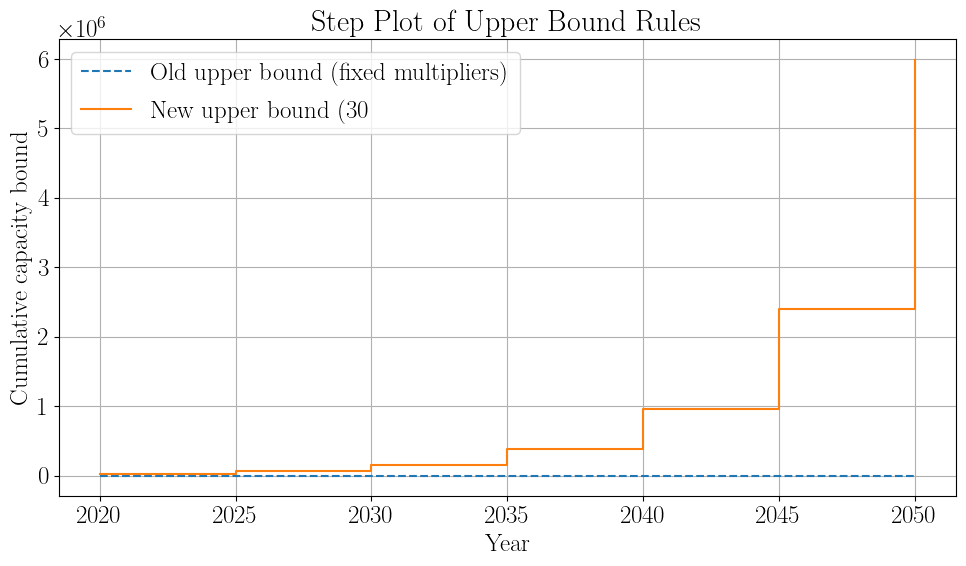

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
y_init = 2020
year_end = 2050
investment_period = 5
years = np.arange(y_init, year_end + 1)
investment_years = np.arange(y_init, year_end + 1, investment_period)

# --- Old version ---
initial_capacity_old = 1000.0 * 1e-6
max_addition_old = {}
max_addition_old[2025] = 900000 * (1 + 0.1) ** (2025 - y_init) * 1e-6

for y in investment_years:
    if y in (y_init, 2025):
        continue
    max_addition_old[y] = 900000 * 2 * (1 + 0.1) ** (y - y_init) * 1e-6

cumulative_bound_old = {y_init: initial_capacity_old}
running_total = initial_capacity_old
for y in sorted(investment_years):
    if y == y_init:
        continue
    running_total += max_addition_old.get(y, 0)
    cumulative_bound_old[y] = running_total

upper_bound_old = []
for y in years:
    past_years = [z for z in cumulative_bound_old if z <= y]
    upper_bound_old.append(cumulative_bound_old[max(past_years)])

# --- New version ---
initial_capacity_new = 1000.0 + 10977 + 12544
cumulative_bound_new = {y_init: initial_capacity_new}

for y in investment_years[1:]:
    prev = cumulative_bound_new[y - investment_period]
    max_growth = 0.3 * investment_period * prev
    cumulative_bound_new[y] = prev + max_growth

upper_bound_new = []
for y in years:
    past_years = [z for z in cumulative_bound_new if z <= y]
    upper_bound_new.append(cumulative_bound_new[max(past_years)])

# --- Step Plot ---
plt.figure(figsize=(10,6))
plt.step(years, upper_bound_old, where="post", linestyle="--", label="Old upper bound (fixed multipliers)")
plt.step(years, upper_bound_new, where="post", linestyle="-", label="New upper bound (30% growth rule)")
plt.xlabel("Year")
plt.ylabel("Cumulative capacity bound")
plt.title("Step Plot of Upper Bound Rules")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


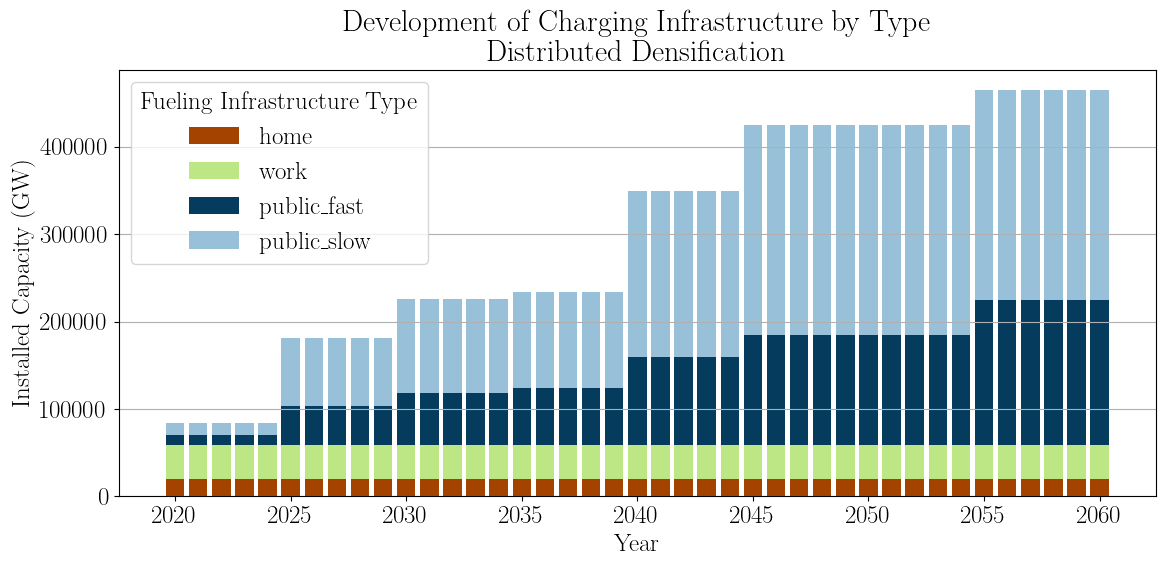

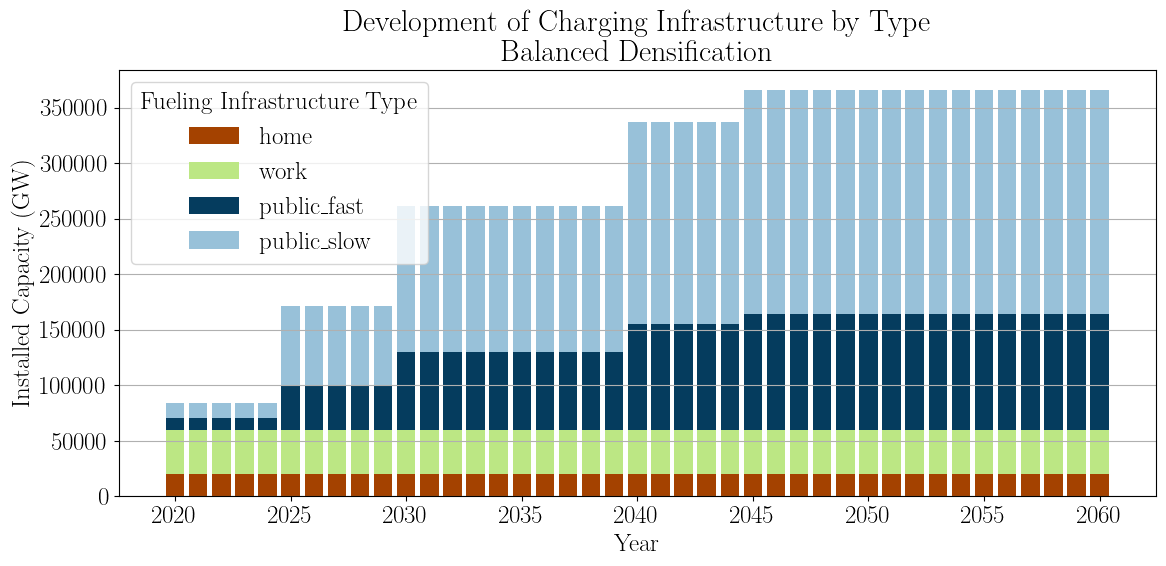

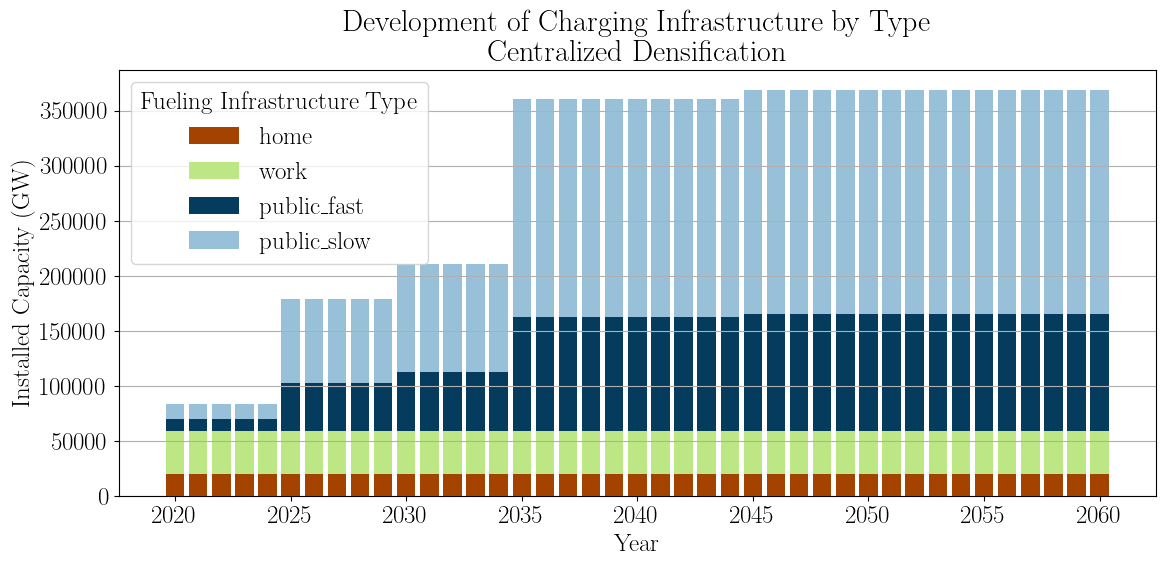

In [ ]:
# Plot stacked bars for each case study: fueling infrastructure by year and type

for case_study, yearly_data in q_fuel_by_type_by_year_by_case_study.items():
    years = sorted(yearly_data.keys())
    l_ids = list(next(iter(yearly_data.values())).keys())
    # Prepare data for each fueling type
    data_by_type = {l_id: [yearly_data[year].get(l_id, 0) for year in years] for l_id in l_ids}
    # Get fueling type names for legend
    fueling_type_names = [l_dict[l_id]['fueling_type'] for l_id in l_ids]
    fueling_type_colors = {
        'home': '#a44200',
        'work': '#bce784',
        'public_slow': '#98c1d9',
        'public_fast': '#053c5e',
    }
    colors = [fueling_type_colors.get(l_dict[l_id]['fueling_type'], None) for l_id in l_ids]

    fig, ax = plt.subplots(figsize=(12, 6))
    bottom = np.zeros(len(years))
    for idx, l_id in enumerate(l_ids):
        values = np.array(data_by_type[l_id]) # Convert to GW if needed
        ax.bar(years, values, bottom=bottom, label=l_dict[l_id]['fueling_type'], color=colors[idx], width=0.8)
        bottom += values
        # Plot the upper bound as a step curve
    # if len(upper_bound_new) >= len(years):
    #     ax.step(years, upper_bound_new[:len(years)], where='post', color='red', linewidth=2, label="Capacity Upper Bound")
    # else:
    #     ax.step(years[:len(upper_bound_new)], upper_bound_new, where='post', color='red', linewidth=2, label="Capacity Upper Bound")
    ax.set_title(f"Development of Charging Infrastructure by Type\n{case_study}")
    ax.set_xlabel("Year")
    ax.set_ylabel("Installed Capacity (GW)")
    ax.legend(title="Fueling Infrastructure Type")
    plt.tight_layout()
    plt.grid(axis='y', zorder=-1)
    plt.show()

In [ ]:
# detour timing for public charging infrastructure 
# fast vs. slow charging + different cases ()

# what do i new for this to reverse ingeneer the detour time? 

dt_by_case_and_type = {}

for case_study_name, output_data in case_study_output.items():
    input_data = case_study_input.get(case_study_name, {})
    if not input_data:
        print(f"⚠️ Missing input for case {case_study_name}, skipping...")
        continue

    x_c = output_data.get("x_c_dict", {})
    initial_dt  = input_data.get("InitDetourTime", [])
    dt_reduction = input_data.get("DetourTimeReduction", [])

    dt_by_case_and_type[case_study_name] = {}

    for l_id, cs_type in {2: "public_fast", 3: "public_slow"}.items():
        dt_by_case_and_type[case_study_name][cs_type] = {}

        for year in np.arange(y_init, Y_end, 5):
            filtered_x_c = {
                k: v for k, v in x_c.items()
                if k[0] == year and k[1][3] == l_id and v == 1
            }
            print(case_study_name, year, l_id, filtered_x_c)

            if len(filtered_x_c) != 1:
                print(
                    f"⚠️ filtered_x_c for year {year}, l_id {l_id}, "
                    f"case {case_study_name} has {len(filtered_x_c)} items (expected 1)."
                )
                continue

            performed_reduction = next(iter(filtered_x_c))
            reducion_id = performed_reduction[1][1]

            # Find matching reduction
            matching_reduction = next(
                (item for item in dt_reduction
                 if item.get("fueling_type") == cs_type
                 and item.get("reduction_id") == reducion_id),
                None
            )
            if matching_reduction is None:
                print(f"⚠️ No matching reduction for {cs_type}, id={reducion_id}, year={year}, case ={case_study_name}")
                continue
            dt_value = matching_reduction.get("detour_time_reduction")

            # Find initial detour time
            matching_initial = next(
                (item for item in initial_dt if item.get("fuel_infr_type") == cs_type),
                None
            )
            if matching_initial is None:
                print(f"⚠️ No initial detour time for {cs_type} in case {case_study_name}")
                continue
            init_dt = matching_initial.get("detour_time")

            # Compute final detour time
            dt_in_this_year_and_type = init_dt if year == 2020 else init_dt * (1 - dt_value)
            dt_by_case_and_type[case_study_name][cs_type][int(year)] = dt_in_this_year_and_type



Distributed Densification 2020 2 {(2020, (1, 0, 2, 2)): 1.0}
Distributed Densification 2025 2 {(2025, (1, 1, 2, 2)): 1.0}
Distributed Densification 2030 2 {(2030, (1, 1, 2, 2)): 1.0}
Distributed Densification 2035 2 {(2035, (1, 1, 2, 2)): 1.0}
Distributed Densification 2040 2 {(2040, (1, 1, 2, 2)): 1.0}
Distributed Densification 2045 2 {(2045, (1, 1, 2, 2)): 1.0}
Distributed Densification 2050 2 {(2050, (1, 1, 2, 2)): 1.0}
Distributed Densification 2055 2 {(2055, (1, 3, 2, 2)): 1.0}
Distributed Densification 2060 2 {(2060, (1, 3, 2, 2)): 1.0}
Distributed Densification 2020 3 {(2020, (1, 0, 2, 3)): 1.0}
Distributed Densification 2025 3 {(2025, (1, 0, 2, 3)): 1.0}
Distributed Densification 2030 3 {(2030, (1, 0, 2, 3)): 1.0}
Distributed Densification 2035 3 {(2035, (1, 0, 2, 3)): 1.0}
Distributed Densification 2040 3 {(2040, (1, 4, 2, 3)): 1.0}
Distributed Densification 2045 3 {(2045, (1, 6, 2, 3)): 1.0}
Distributed Densification 2050 3 {(2050, (1, 6, 2, 3)): 1.0}
Distributed Densificatio

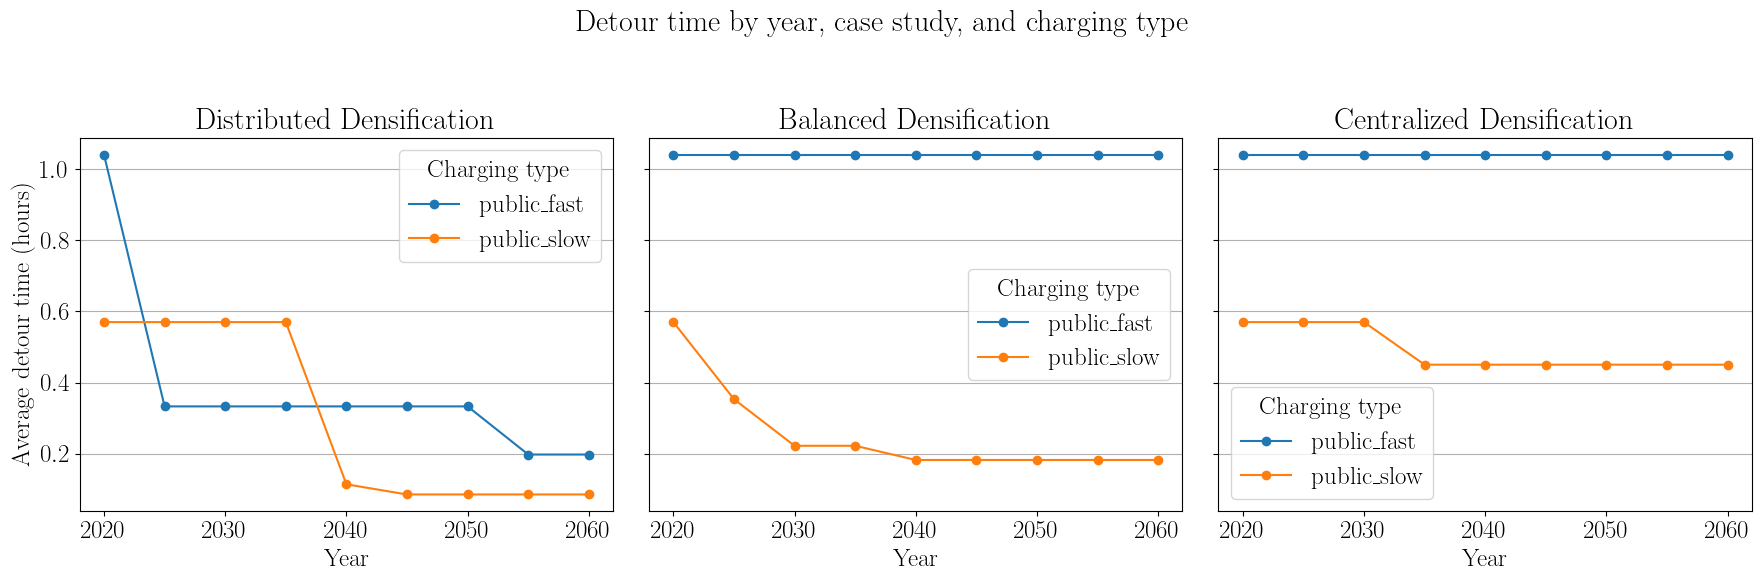

In [ ]:
# Plot detour time by year for each case study and charging type

fig, axes = plt.subplots(1, len(dt_by_case_and_type), figsize=(18, 6), sharey=True)
if len(dt_by_case_and_type) == 1:
    axes = [axes]

for idx, (case, dt_types) in enumerate(dt_by_case_and_type.items()):
    ax = axes[idx]
    for charging_type, dt_years in dt_types.items():
        years = sorted(dt_years.keys())
        values = [dt_years[y] for y in years]
        ax.plot(years, values, marker='o', label=charging_type)
    ax.set_title(case)
    ax.set_xlabel("Year")
    if idx == 0:
        ax.set_ylabel("Average detour time (hours)")
    ax.legend(title="Charging type")
    ax.grid(True, axis='y', zorder=-1)

plt.suptitle("Detour time by year, case study, and charging type")
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [ ]:
# plotting the fueling allocation
year = 2040
fueled_energy_by_fs = {}
for l in [1, 2, 3]:
    for year in range(y_init+5, Y_end):
        for case_study_name, output_data in case_study_output.items():
            input_data = case_study_input[case_study_name]

            s = output_data["s"]
            financial_status = input_data["FinancialStatus"]
            odpair_list = input_data["Odpair"]
            financial_status_dict = {item["name"]: item for item in financial_status}
            odpair_list_dict = {item["id"]: item for item in odpair_list}
            techvehicle_list = input_data["TechVehicle"]
            fuel_list = input_data["Fuel"]
            geographic_elements = input_data["GeographicElement"]
            geographic_elements_dict = {item["id"]: item for item in geographic_elements}
            techvehicle_list_dict = {item["id"]: item for item in techvehicle_list}
            fuel_list_dict = {item["id"]: item for item in fuel_list}
            # l = input_data["FuelingInfrTypes"]
            # l_dict = {item["id"]: item for item in l}
            fueled_energy_by_fs_by_cs = {}
            for fs in financial_status_dict.keys():
                # for l in l_dict.keys():
                energy_total = sum([s.get((year, (1, r, odpair_list_dict[r]["path_id"], geo), tv, (f, l), g)) for geo in geographic_elements_dict.keys() for f in fuel_list_dict.keys() for r in odpair_list_dict.keys() for tv in techvehicle_list_dict.keys() for g in range(g_init, year) if (year, (1, r, odpair_list_dict[r]["path_id"], geo), tv, (f, l), g) in s and fs == odpair_list_dict[r]["financial_status"]])
                    # if case_study_name == "Centralized Densification":
                    #     # print("Energy total for fs:", fs, "and l:", l, "is", energy_total)
                    #     fueled_energy_by_fs_by_cs[(fs, l)] = energy_total * 1000
                    # else:
                        # print("Energy total for fs:", fs, "and l:", l, "is", energy_total)
                fueled_energy_by_fs_by_cs[(fs, l)] = energy_total
            
            
            fueled_energy_by_fs[(year, case_study_name, l)] = fueled_energy_by_fs_by_cs

In [ ]:
print(range(y_init, Y_end))
print(Y_end)

range(2020, 2061)
2061


In [ ]:
for case_study, fs_dict in fueled_energy_by_fs.items():
    print(f"Case study: {case_study}")
    for key, value in fs_dict.items():
        print(f"  Key: {key}, Value: {value}")
    print("-" * 40)

Case study: (2025, 'Distributed Densification', 1)
  Key: ('First quintile', 1), Value: 335.731436
  Key: ('Second quintile', 1), Value: 0.0
  Key: ('Third quintile', 1), Value: 0.0
  Key: ('Fourth quintile', 1), Value: 8072.468504
  Key: ('Fifth quintile', 1), Value: 33263.994491
  Key: ('Commercial', 1), Value: 25074.954581
----------------------------------------
Case study: (2025, 'Balanced Densification', 1)
  Key: ('First quintile', 1), Value: 480.543257
  Key: ('Second quintile', 1), Value: 0.0
  Key: ('Third quintile', 1), Value: 644.775479
  Key: ('Fourth quintile', 1), Value: 9745.049952
  Key: ('Fifth quintile', 1), Value: 34600.06
  Key: ('Commercial', 1), Value: 23495.299339
----------------------------------------
Case study: (2025, 'Centralized Densification', 1)
  Key: ('First quintile', 1), Value: 334.974282
  Key: ('Second quintile', 1), Value: 0.0
  Key: ('Third quintile', 1), Value: 0.0
  Key: ('Fourth quintile', 1), Value: 8275.917104
  Key: ('Fifth quintile', 1), 

In [ ]:
case_colors = {
    "Balanced Densification": "blue",
    "Distributed Densification": "green",
    "Centralized Densification": "red"
}
markers = {
    "Balanced Densification": "o",
    "Distributed Densification": "s",
    "Centralized Densification": "D"
}

In [ ]:
# Calculate load factors for all infrastructure types including home charging
# l_id: 0=home, 1=work/public_AC, 2=public_fast, 3=public_slow

load_factors = {}
for case_study in q_fuel_by_type_by_year_by_case_study.keys():
    load_factors[case_study] = {}
    
    # Get q_fuel_infr_plus_by_route for this case study to calculate home charging capacity
    output_data_case = [d for d in all_output_data if d.get('case_study') == case_study]
    q_fuel_infr_plus_by_route = output_data_case[0].get('q_fuel_infr_plus_by_route', {}) if output_data_case else {}
    
    for l_id in [0, 1, 2, 3]:  # 0: home, 1: work/public_AC, 2: public_fast, 3: public_slow
        lf_per_year = {}
        for year in range(y_init + 5, Y_end):
            # Get fueled energy in MWh
            energy = sum(fueled_energy_by_fs.get((year, case_study, l_id), {}).values())  # MWh
            
            # Get installed capacity in MW
            if l_id == 0:  # Home charging - sum from q_fuel_infr_plus_by_route
                # Calculate cumulative home charging capacity from q_fuel_infr_plus_by_route
                home_capacity = 40000.0  # Initial home capacity (20000 * 2)
                for y in range(y_init, year + 1):
                    for key, value in q_fuel_infr_plus_by_route.items():
                        if isinstance(key, tuple) and len(key) >= 3:
                            key_year = key[0]
                            if key_year == y and isinstance(key[2], tuple) and len(key[2]) >= 2:
                                infr_type_id = key[2][1]
                                if infr_type_id == 0:  # home charging
                                    home_capacity += value
                capacity = home_capacity / 1e3  # Convert kW to MW
            else:  # Other infrastructure types
                capacity = q_fuel_by_type_by_year_by_case_study[case_study][year].get(l_id, 0) / 1e3  # MW
            
            # hours per year
            hours = 8760
            
            # load factor: actual energy delivered / (installed capacity * hours)
            lf = energy / (capacity * hours) if capacity > 0 else 0
            lf_per_year[year] = lf
        
        load_factors[case_study][l_id] = lf_per_year

print("Load factors calculated for all infrastructure types (0=home, 1=work, 2=public_fast, 3=public_slow)")

# Create comprehensive utilization rate visualization
fig, axes = plt.subplots(len(load_factors), 1, figsize=(16, 7 * len(load_factors)))

if len(load_factors) == 1:
    axes = [axes]

colors_for_utilization_factors = {
    'home': '#a44200',
    'work': '#bce784',
    'public_slow': '#98c1d9',
    'public_fast': '#053c5e',
}

labels_for_utilization = {
    0: 'Level II --- home',
    1: 'Level II --- workplace',
    2: 'DCFC',
    3: 'Level II - public',
}

# Find max utilization for consistent y-axis
max_utilization = 0.3
for case_study in load_factors:
    for l_id in [0, 1, 2, 3]:
        if load_factors[case_study][l_id]:
            max_util_case = max(load_factors[case_study][l_id].values())
            max_utilization = max(max_utilization, max_util_case)
max_utilization = min(max_utilization * 1.1, 0.35)  # Add 10% margin, cap at 0.35

handles = []
labels = []

for row_idx, case_study in enumerate(sorted(load_factors.keys())):
    ax = axes[row_idx]
    
    years = sorted(load_factors[case_study][2].keys())  # Use public_fast years as reference
    
    # Plot all infrastructure types
    lf_home = [load_factors[case_study][0].get(y, 0) for y in years]
    lf_work = [load_factors[case_study][1].get(y, 0) for y in years]
    lf_public_slow = [load_factors[case_study][3].get(y, 0) for y in years]
    lf_public_fast = [load_factors[case_study][2].get(y, 0) for y in years]
    
    ax.grid(True, axis='y', zorder=0, alpha=0.3)
    
    # Plot with different markers for each type
    home_scatter = ax.scatter(years, lf_home, color=colors_for_utilization_factors["home"], 
                              marker='d', s=80, zorder=2, alpha=0.8, label=labels_for_utilization[0])
    work_scatter = ax.scatter(years, lf_work, color=colors_for_utilization_factors["work"], 
                              marker='^', s=80, zorder=2, alpha=0.8, label=labels_for_utilization[1])
    slow_scatter = ax.scatter(years, lf_public_slow, color=colors_for_utilization_factors["public_slow"], 
                              marker='s', s=80, zorder=2, alpha=0.8, label=labels_for_utilization[3])
    fast_scatter = ax.scatter(years, lf_public_fast, color=colors_for_utilization_factors["public_fast"], 
                              marker='o', s=80, zorder=2, alpha=0.8, label=labels_for_utilization[2])
    
    # Add lines connecting points
    ax.plot(years, lf_home, color=colors_for_utilization_factors["home"], alpha=0.3, linewidth=1.5, zorder=1)
    ax.plot(years, lf_work, color=colors_for_utilization_factors["work"], alpha=0.3, linewidth=1.5, zorder=1)
    ax.plot(years, lf_public_slow, color=colors_for_utilization_factors["public_slow"], alpha=0.3, linewidth=1.5, zorder=1)
    ax.plot(years, lf_public_fast, color=colors_for_utilization_factors["public_fast"], alpha=0.3, linewidth=1.5, zorder=1)
    
    # Maximum utilization rate line
    ax.axhline(0.25, color='#bf4342', linestyle='--', linewidth=2.5, zorder=1, alpha=0.8)
    
    if row_idx == 0:
        handles = [home_scatter, work_scatter, slow_scatter, fast_scatter]
        labels = [labels_for_utilization[0], labels_for_utilization[1], 
                 labels_for_utilization[3], labels_for_utilization[2]]
        handles.append(ax.axhline(0.25, color='#bf4342', linestyle='--', linewidth=2.5))
        labels.append("Maximum utilization rate")
    
    ax.set_ylim(0, max_utilization)
    ax.set_xlim(2023, 2052)
    
    # Add vertical lines and arrows at investment years
    for inv_year in range(2025, years[-1]+1, 5):
        ax.axvline(inv_year, color='grey', linestyle='--', alpha=0.2, linewidth=2, zorder=0)
        ax.annotate(
            '', xy=(inv_year, max_utilization * 0.95), xytext=(inv_year, max_utilization * 0.88),
            arrowprops=dict(arrowstyle='->', color='grey', lw=1.5, alpha=0.5),
            ha='center',
            zorder=3
        )
    
    ax.set_xlabel("Year", fontsize=16, fontweight='bold')
    ax.set_ylabel("Utilization rate", fontsize=16, fontweight='bold')
    ax.tick_params(axis='both', labelsize=14)
    
    # Add case study label
    ax.text(-0.08, 0.5, case_study.replace('_', ' '),
            transform=ax.transAxes,
            va='center', ha='right',
            fontsize=16, fontweight='bold',
            rotation=90)

# Add shared legend
fig.legend(handles, labels,
          loc="lower center",
          bbox_to_anchor=(0.5, -0.02),
          ncol=5,
          fontsize=15,
          title="Charging infrastructure type",
          title_fontsize=16,
          frameon=True)

fig.suptitle("Utilization Rates by Charging Infrastructure Type",
            fontsize=22, fontweight='bold', y=0.995)

plt.tight_layout(rect=[0.08, 0.05, 1, 0.98])
plt.show()

print("\nUtilization rate visualization complete!")

<>:27: SyntaxWarning: invalid escape sequence '\d'
<>:27: SyntaxWarning: invalid escape sequence '\d'
C:\Users\simuser\AppData\Local\Temp\ipykernel_24176\3590674074.py:27: SyntaxWarning: invalid escape sequence '\d'
  '$\downarrow$', xy=(inv_year, 0.29), xytext=(inv_year, 0.28),
C:\Users\simuser\AppData\Local\Temp\ipykernel_24176\3590674074.py:41: UserWarning: Mismatched number of handles and labels: len(handles) = 5 len(labels) = 6
  plt.legend(


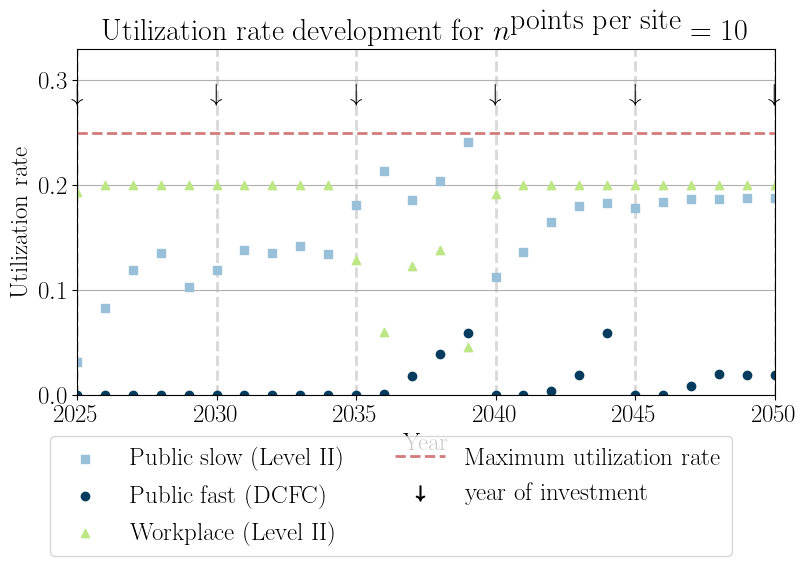

In [ ]:
from matplotlib.lines import Line2D

# Plot load factor development for one case study (e.g., "Balanced Densification")
case_study = "Distributed Densification"
years = sorted(load_factors[case_study][2].keys())
lf_fast = [load_factors[case_study][2][y] for y in years]
lf_slow = [load_factors[case_study][3][y] for y in years]
colors_for_utilization_factors = {
    'public_slow': '#98c1d9',
    'public_fast': '#053c5e',
    "work": '#bce784',
}
plt.figure(figsize=(9, 4.5))
plt.grid(True, axis='y', zorder=0)  # grid in the background

plt.scatter(years, lf_slow, label="Public slow (Level II)", color=colors_for_utilization_factors["public_slow"], marker='s', zorder=2)
plt.scatter(years, lf_fast, label="Public fast (DCFC)", color=colors_for_utilization_factors["public_fast"], marker='o', zorder=2)
plt.scatter(years, [load_factors[case_study][1][y] for y in years], label="Workplace (Level II)", color=colors_for_utilization_factors["work"], marker='^', zorder=2)
plt.axhline(0.25, color='#bf4342', linestyle='--', linewidth=2, label="Maximum utilization rate", zorder=1, alpha=0.7)

plt.ylim(0, 0.33)  # Increase y-axis limit
plt.xlim(2025, 2050)
# Add vertical transparent lines and downward arrows at investment years
for inv_year in range(2025, years[-1]+1, 5):
    plt.axvline(inv_year, color='grey', linestyle='--', alpha=0.3, linewidth=2, zorder=1)
    plt.annotate(
        '$\downarrow$', xy=(inv_year, 0.29), xytext=(inv_year, 0.28),
        ha='center',  # align arrow horizontally center
        zorder=3
    )
# Add a dummy scatter for legend entry "year of investment"
# Add a dummy arrow for legend entry "year of investment"
# Create a dummy arrow for legend entry "year of investment"

plt.scatter([], [], marker=r'$\downarrow$', color='black', s=120, label='year of investment')  # dummy for legend

plt.xlabel("Year")
plt.ylabel("Utilization rate")
plt.title(r"Utilization rate development for $n^{\textrm{points per site}} = 10$")

plt.legend(
    handles=plt.gca().get_legend_handles_labels()[0],
    labels=plt.gca().get_legend_handles_labels()[1] + ["year of investment"],
    loc="lower center", bbox_to_anchor=(0.45, -0.5), ncol=2
)
# plt.tight_layout()

plt.savefig("rq_1_load_factor_development_balanced_densification.pdf", bbox_inches="tight")


Distributed Densification - public_fast
Distributed Densification - public_slow
Balanced Densification - public_fast
Balanced Densification - public_slow
Centralized Densification - public_fast
Centralized Densification - public_slow


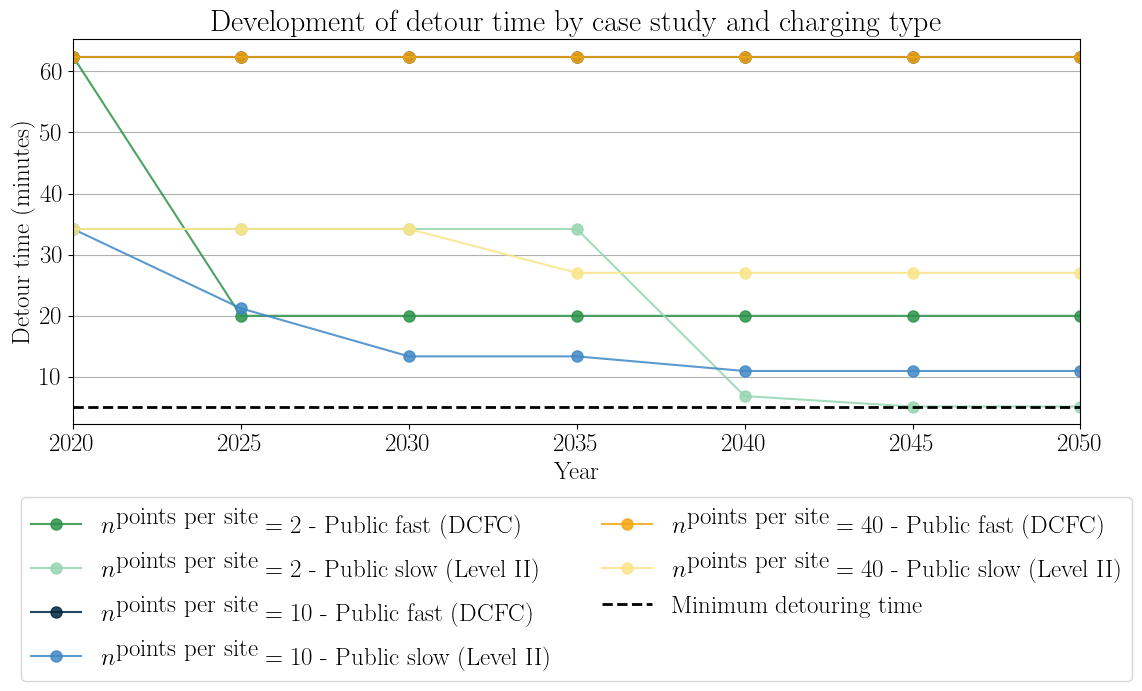

In [ ]:
# Plot the development of the value in dt_by_case_and_type for each type
lower_lim = 5
import matplotlib.pyplot as plt

colors_by_case = {
    "Balanced Densification - public_fast": "#002642",
    "Balanced Densification - public_slow": "#3f88c5",
    "Distributed Densification - public_fast": "#2b9348",
    "Distributed Densification - public_slow": "#95d5b2",
    "Centralized Densification - public_fast": "#f3a712",
    "Centralized Densification - public_slow": "#fae588"
}

actual_labels = {
    "Distributed Densification": r"$n^{\textrm{points per site}} = 2$",
    "Balanced Densification": r"$n^{\textrm{points per site}} = 10$",
    "Centralized Densification": r"$n^{\textrm{points per site}} = 40$"
}
correct_labels = {
    "public_fast": "Public fast (DCFC)",
    "public_slow": "Public slow (Level II)"  
}
fig, ax = plt.subplots(figsize=(13, 5))
for case_study, type_dict in dt_by_case_and_type.items():
    for cs_type, year_dict in type_dict.items():
        years = sorted(year_dict.keys())
        values = [year_dict[y]*60 for y in years]
        ax.plot(years, values, color=colors_by_case.get(f"{case_study} - {cs_type}", "black"), marker='o', label=f"{actual_labels[case_study]} - {correct_labels[cs_type]}", markersize=8, alpha=0.85)
        print(f"{case_study} - {cs_type}")
ax.set_xlabel("Year")
ax.set_ylabel("Detour time (minutes)")
ax.set_title("Development of detour time by case study and charging type")
plt.xlim([2020, 2050])
ax.axhline(5, color='black', linestyle='--', linewidth=2, label="Minimum detouring time")
plt.grid(True, axis='y', zorder=-1)
ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.7), ncol=2)
# plt.tight_layout()

fig.savefig("rq_1_detour_time_development_by_case_and_type.pdf", bbox_inches="tight")

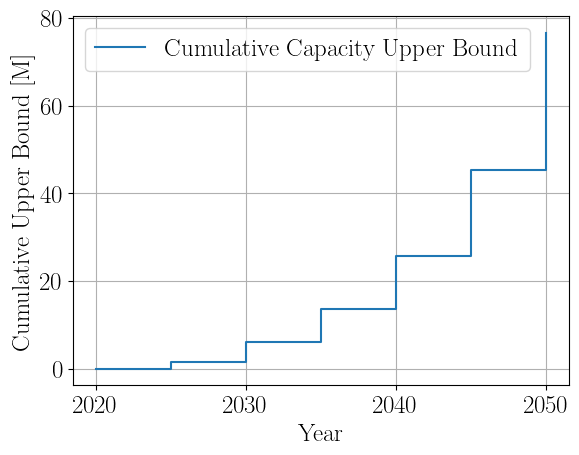

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters (adjust as in your JuMP model)
y_init = 2020
year_end = 2050
investment_period = 5

years = np.arange(y_init, year_end + 1)  # full year range
investment_years = np.arange(y_init, year_end + 1, investment_period)

# Store per-period maximum additions
max_addition = {}

# Initial capacity (not an addition, but the starting level)
initial_capacity = 10000.0 * 1e-6

# Special bound at 2025
max_addition[2025] = 900000 * (1 + 0.1) ** (2025 - y_init) * 1e-6

# General bounds for other investment years
for y in investment_years:
    if y in (y_init, 2025):
        continue
    max_addition[y] = 900000 * 2 * (1 + 0.1) ** (y - y_init) * 1e-6

# Build cumulative bound
cumulative_bound = {}
cumulative_bound[y_init] = initial_capacity

running_total = initial_capacity
for y in sorted(investment_years):
    if y == y_init:
        continue
    running_total += max_addition[y]
    cumulative_bound[y] = running_total

# Expand cumulative bound to all years (stepwise)
upper_bound_array = []
for y in years:
    past_years = [z for z in cumulative_bound.keys() if z <= y]
    upper_bound_array.append(cumulative_bound[max(past_years)])

# Plot cumulative bound
plt.step(years, upper_bound_array, where='post', label="Cumulative Capacity Upper Bound")
plt.xlabel("Year")
plt.ylabel("Cumulative Upper Bound [M]")
plt.legend()
plt.grid(True)
plt.show()


maximum_home_charging = 27276+50007+77284+90923+90923+90923
maximum_work_place_charging=1143558

In [ ]:
# --- New version ---
initial_capacity_new = 1000.0 + 10977 + 12544
cumulative_bound_new = {y_init: initial_capacity_new}

for y in investment_years[1:]:
    prev = cumulative_bound_new[y - investment_period]
    max_growth = 0.3 * investment_period * (prev + 10977 + 12544)
    cumulative_bound_new[y] = prev + max_growth

upper_bound_new = []
for y in years:
    past_years = [z for z in cumulative_bound_new if z <= y]
    upper_bound_new.append(cumulative_bound_new[max(past_years)])

<>:97: SyntaxWarning: invalid escape sequence '\d'
<>:97: SyntaxWarning: invalid escape sequence '\d'
C:\Users\simuser\AppData\Local\Temp\ipykernel_24176\756115898.py:97: SyntaxWarning: invalid escape sequence '\d'
  '$\downarrow$', xy=(inv_year, 0.29), xytext=(inv_year, 0.28),


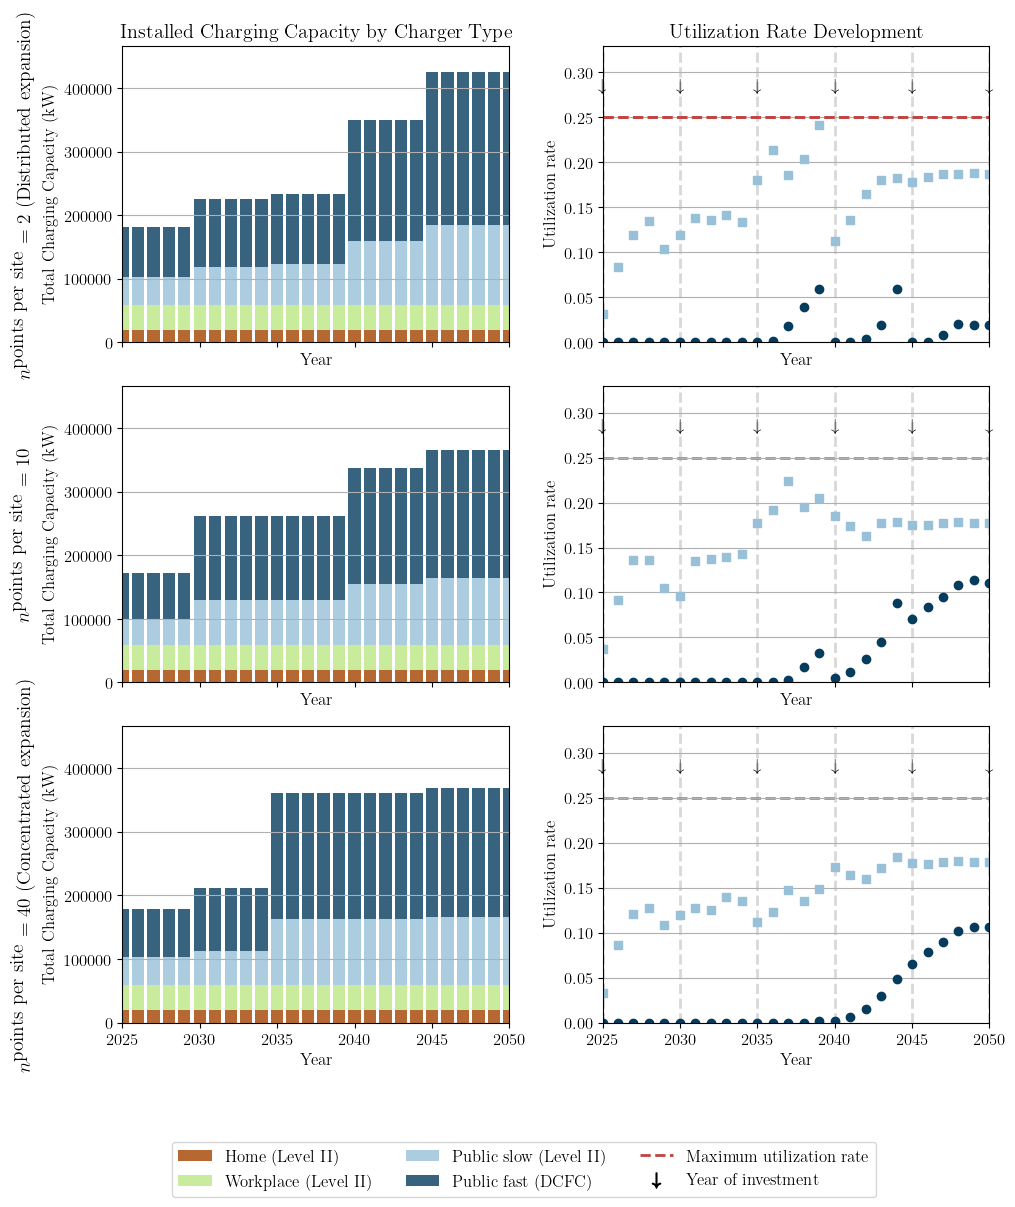

In [ ]:

plt.rcParams.update({'font.size': 12})  # adjust font size
fig, axes = plt.subplots(len(q_fuel_by_type_by_year_by_case_study), 2, figsize=(10, 4 * len(q_fuel_by_type_by_year_by_case_study)), sharex=True)

if len(q_fuel_by_type_by_year_by_case_study) == 1:
    axes = [axes]  # Ensure axes is always a list of lists for consistency

fueling_type_colors = {
        'home': '#a44200',
        'work': '#bce784',
        'public_slow': '#98c1d9',
        'public_fast': '#053c5e',
    }
fueling_labels = {
    'home': 'Home (Level II)',
    'work': 'Workplace (Level II)',
    'public_slow': 'Public slow (Level II)',
    'public_fast': 'Public fast (DCFC)',
}
handles, labels = [], []  # Collect handles and labels for the total legend

# Determine consistent y-axis limits for both columns
max_capacity = max(
    sum([yearly_data[2049].get(l_id, 0) for l_id in ordered_fueling_type_ids])
    for yearly_data in q_fuel_by_type_by_year_by_case_study.values()
) * 1.1
max_utilization = 0.33  # Fixed maximum utilization rate for all rows

for row_idx, (case_study, yearly_data) in enumerate(q_fuel_by_type_by_year_by_case_study.items()):
    if row_idx == 0:
        axes[row_idx][0].set_title("Installed Charging Capacity by Charger Type")
        axes[row_idx][1].set_title("Utilization Rate Development")
    years_plot = np.array(sorted(yearly_data.keys()))
    l_ids = ordered_fueling_type_ids  # order of charging types
    l_ids = [0, 1, 2, 3]  # specific order: home, work, public_slow, public_fast
    # Subplot 1: Installed capacity by type (stacked bars) and upper bound (step curve)
    ax0 = axes[row_idx][0]
    bottom = np.zeros(len(years_plot))
    for l_id in l_ids:
        values = np.array([yearly_data[y].get(l_id, 0) for y in years_plot])
        bars = ax0.bar(
            years_plot, values, bottom=bottom, label=fueling_labels[ordered_fueling_types[l_id]],
            color=fueling_type_colors[ordered_fueling_types[l_id]], width=0.8, alpha=0.8, align="center"
        )
        bottom += values
        if row_idx == 0:  # Collect legend handles and labels only once
            handles.append(bars[0])
            labels.append(fueling_labels[ordered_fueling_types[l_id]])

    # Upper bound step curve
    #bounds_years = np.array(sorted(system_capacity.keys()))
    #system_vals = [system_capacity[y] for y in bounds_years]
    # step, = ax0.step(bounds_years - 0.5, system_vals, where='post',
    #                  label="Upper Bound on Investments", color='#bf4342', linewidth=2)
    # if row_idx == 0:
    #     handles.append(step)
    #     labels.append("Upper Bound on Investments")

    # Titles, labels, and formatting
    # ax0.set_title(f"Installed Charging Capacity by Type\n{case_study}")
    ax0.set_xlabel("Year")
    ax0.set_ylabel("Total Charging Capacity (kW)")
    ax0.grid(axis='y', zorder=-1)
    ax0.set_ylim(0, max_capacity)
    ax0.set_xlim([2020, 2049])

    # Subplot 2: Utilization rate development
    ax1 = axes[row_idx][1]
    years = sorted(load_factors[case_study][2].keys())
    lf_fast = [load_factors[case_study][2][y] for y in years]
    lf_slow = [load_factors[case_study][3][y] for y in years]
    lf_wp = [load_factors[case_study][1][y] for y in years]
    colors_for_utilization_factors = {
        'public_slow': '#98c1d9',
        'public_fast': '#053c5e',
        'work': '#bce784',
    }

    ax1.grid(True, axis='y', zorder=0)  # grid in the background
    slow_scatter = ax1.scatter(years, lf_slow, color=colors_for_utilization_factors["public_slow"], marker='s', zorder=2)
    fast_scatter = ax1.scatter(years, lf_fast, color=colors_for_utilization_factors["public_fast"], marker='o', zorder=2)
    # work_scatter = ax1.scatter(years, lf_wp, color=colors_for_utilization_factors["work"], marker='^', zorder=2)
    #handles.extend([slow_scatter, fast_scatter])
    # labels.extend(["Public slow (Level II)", "Public fast (Level III)"])

    ax1.axhline(0.25, color='#bf4342', linestyle='--', linewidth=2, label="Maximum utilization rate", zorder=1, alpha=0.7)
    if row_idx == 0:
        handles.append(ax1.axhline(0.25, color='#bf4342', linestyle='--', linewidth=2))
        labels.append("Maximum utilization rate")

    ax1.set_ylim(0, max_utilization)  # Consistent y-axis limit for utilization rate
    ax1.set_xlim(2025, 2050)

    # Add vertical transparent lines and downward arrows at investment years
    for inv_year in range(2025, years[-1]+1, 5):
        ax1.axvline(inv_year, color='grey', linestyle='--', alpha=0.3, linewidth=2, zorder=1)
        ax1.annotate(
            '$\downarrow$', xy=(inv_year, 0.29), xytext=(inv_year, 0.28),
            ha='center',  # align arrow horizontally center
            zorder=3
        )

    ax1.set_xlabel("Year")
    ax1.set_ylabel("Utilization rate")
    # ax1.set_title(f"Utilization Rate Development\n{case_study}")
dummy_arrow = plt.scatter([], [], marker=r'$\downarrow$', color='black', s=120, label='Year of investment')  # dummy for legend
handles.append(dummy_arrow)
labels.append('Year of investment')
# Add a single legend for the entire figure
fig.legend(handles, labels, loc="lower center", bbox_to_anchor=(0.5, -0.000), ncol=3)


plt.tight_layout(rect=[0, 0.1, 1, 1])  # Adjust layout to make space for the legend
for row_idx, case in enumerate(q_fuel_by_type_by_year_by_case_study.keys()):
    row_axes = axes[row_idx, :] if len(q_fuel_by_type_by_year_by_case_study) > 1 else [axes[row_idx]]
    pos_row = [ax.get_position() for ax in row_axes]
    y_mid = (min(p.y0 for p in pos_row) + max(p.y1 for p in pos_row)) / 2
    x_left = pos_row[0].x0 - 0.1
    fig.text(
        x_left, y_mid,
        actual_labels[case],
        va='center', ha='center',
        fontsize=14, fontweight='bold',
        rotation=90
    )

fig.savefig("rq_1_installed_capacity_and_load_factor_centralized_densification.pdf",
            bbox_inches="tight")


In [ ]:
# verification/ analysis of the exceeding budget constraint 

